# Anaysis of Follower-force Buckling Dynamics Data

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [2]:
# Load the file and extract data

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_final/activity_timescale_575'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_final/activity_timescale_1050'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2021-12-19'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_30_Jan_2022/activity_timescale_600'


# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2022-03-03'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_30_Jan_2022/activity_timescale_750'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_30_Jan_2022/activity_timescale_800'

data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/ActivityTime_Sweep_FINAL'
# List all subfolders in the folder
folders = [folder for folder in next(os.walk(data_folder))[1] if 'PredictedDynamics' not in folder and 'FixedPointAnalysis' not in folder]

for ii, folder in enumerate(folders):
    print(ii, folder)

0 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_450_simType_point
1 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point
2 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_250_simType_point
3 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_500_simType_point
4 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_850_simType_point
5 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_300_simType_point
6 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_800_simType_point
7 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_950_simType_point
8 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_350_simType_point
9 SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_600_simType_point
10 SimData_Np_32_Shape_line_kappa_hat_6_

# Analysis for Dynamical behavior prediction.
Run all numbered Cells in sequence.

## 1. Run analysis on each filament condition

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_450_simType_point
Activity time 450
PotDipole strength 1.5
1.0833758560480489


<IPython.core.display.Javascript object>


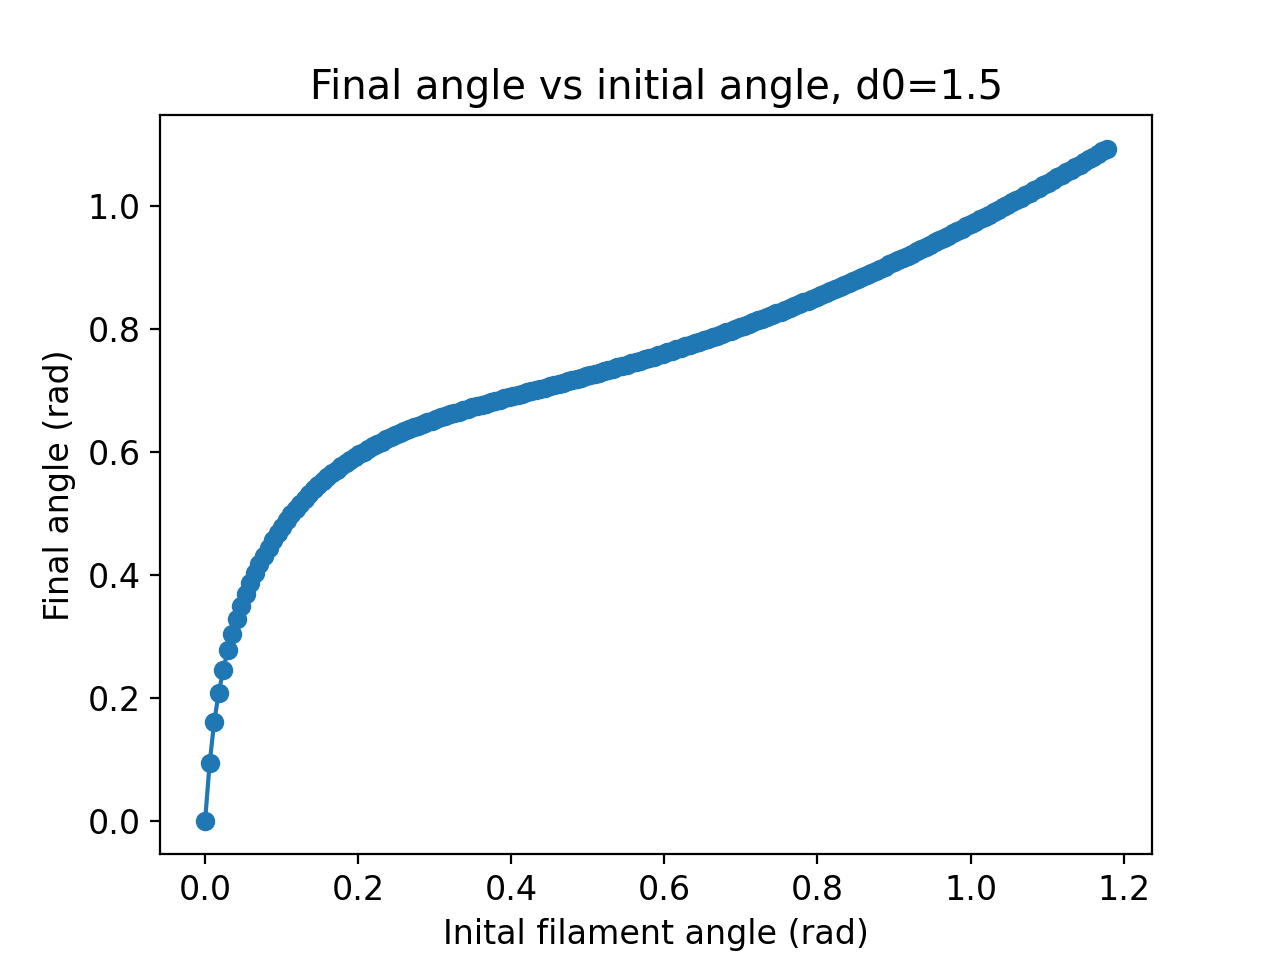

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point
Activity time 700
PotDipole strength 1.5
1.0833758633070132


<IPython.core.display.Javascript object>


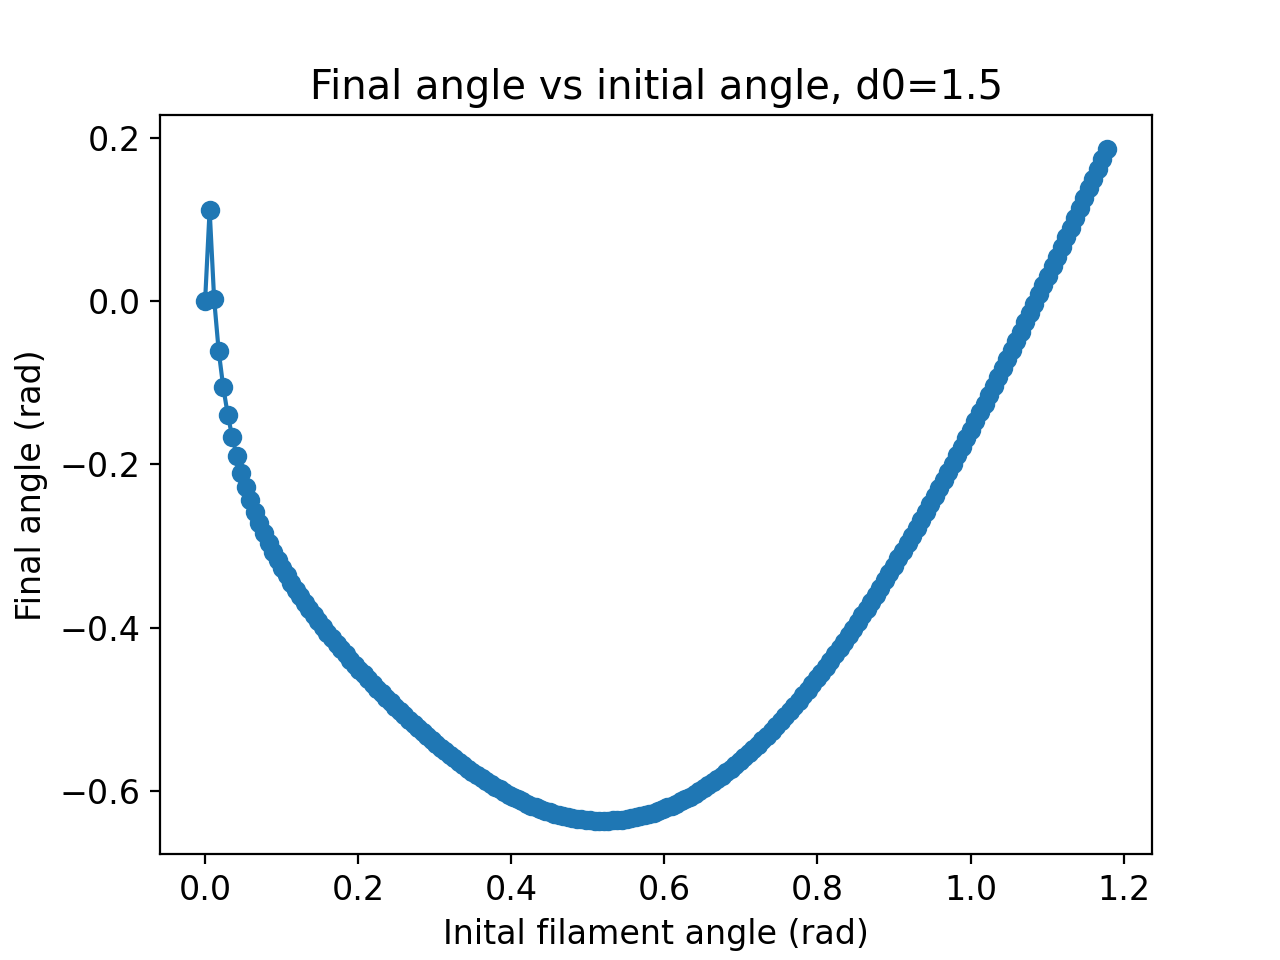

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_250_simType_point
Activity time 250
PotDipole strength 1.5
1.0833758545542083


<IPython.core.display.Javascript object>


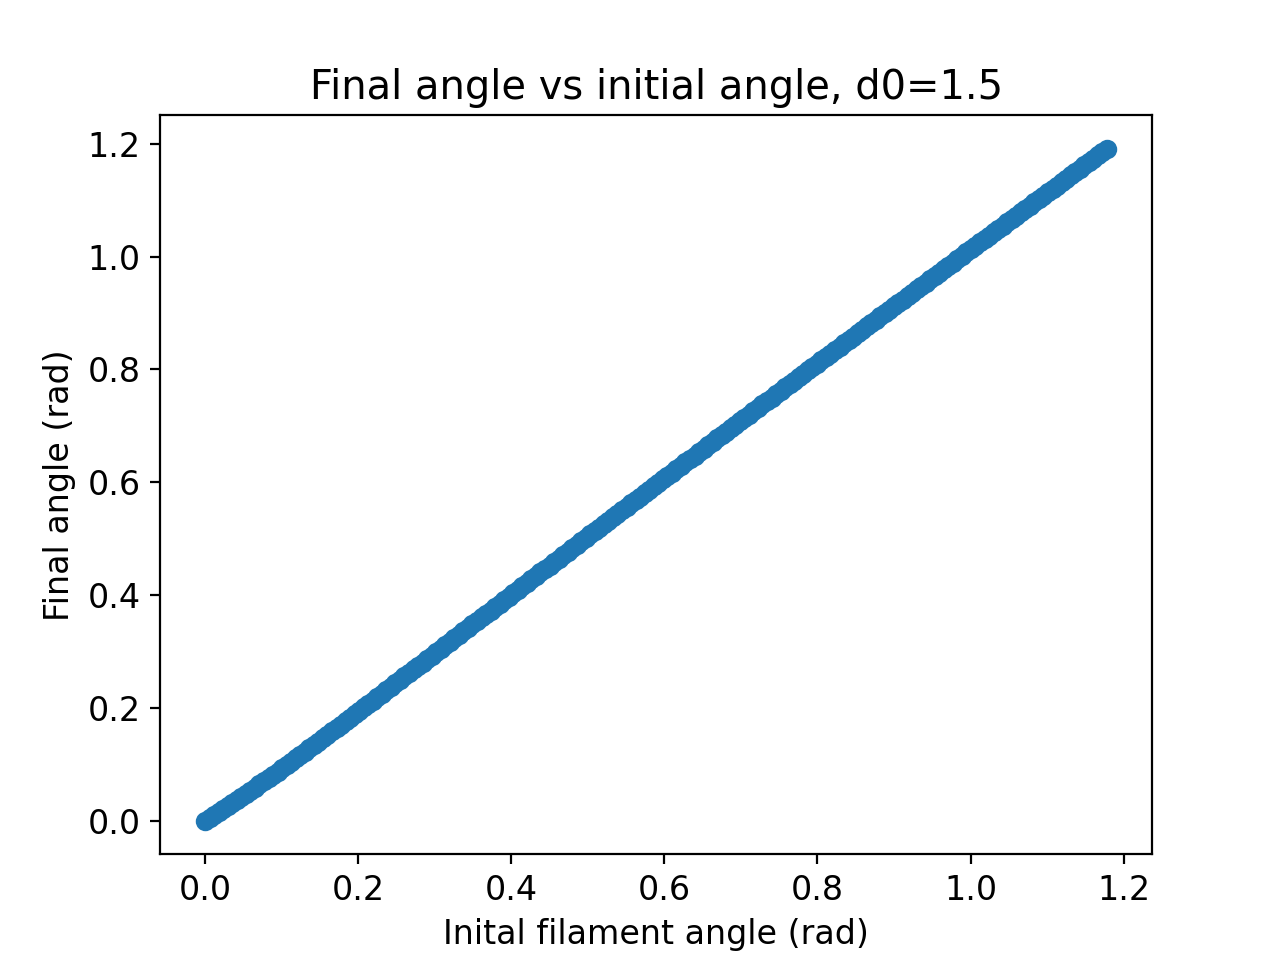

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_500_simType_point
Activity time 500
PotDipole strength 1.5
1.0833758505888271


<IPython.core.display.Javascript object>


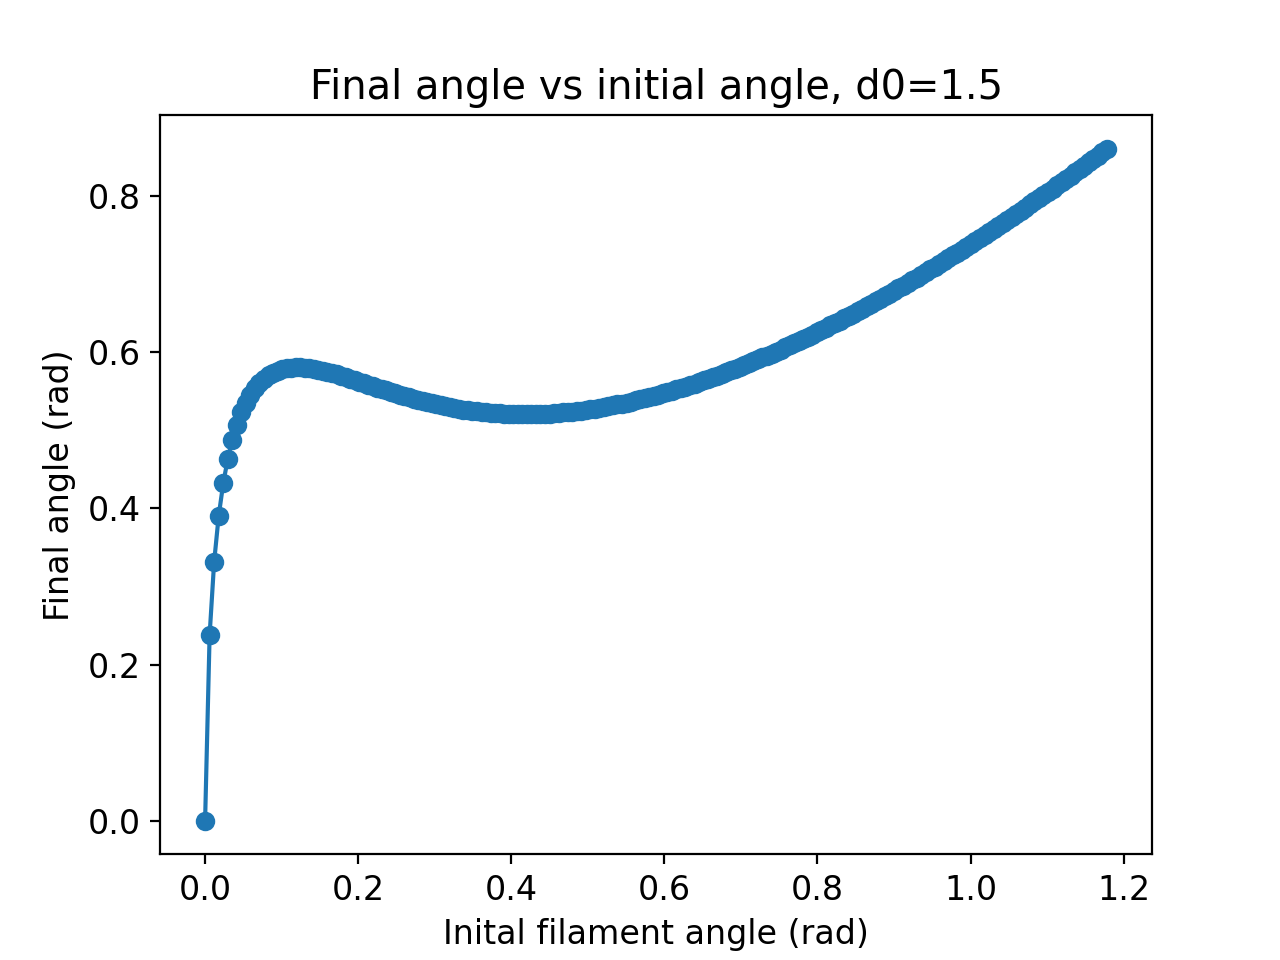

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_850_simType_point
Activity time 850
PotDipole strength 1.5
1.0774557752887728


<IPython.core.display.Javascript object>


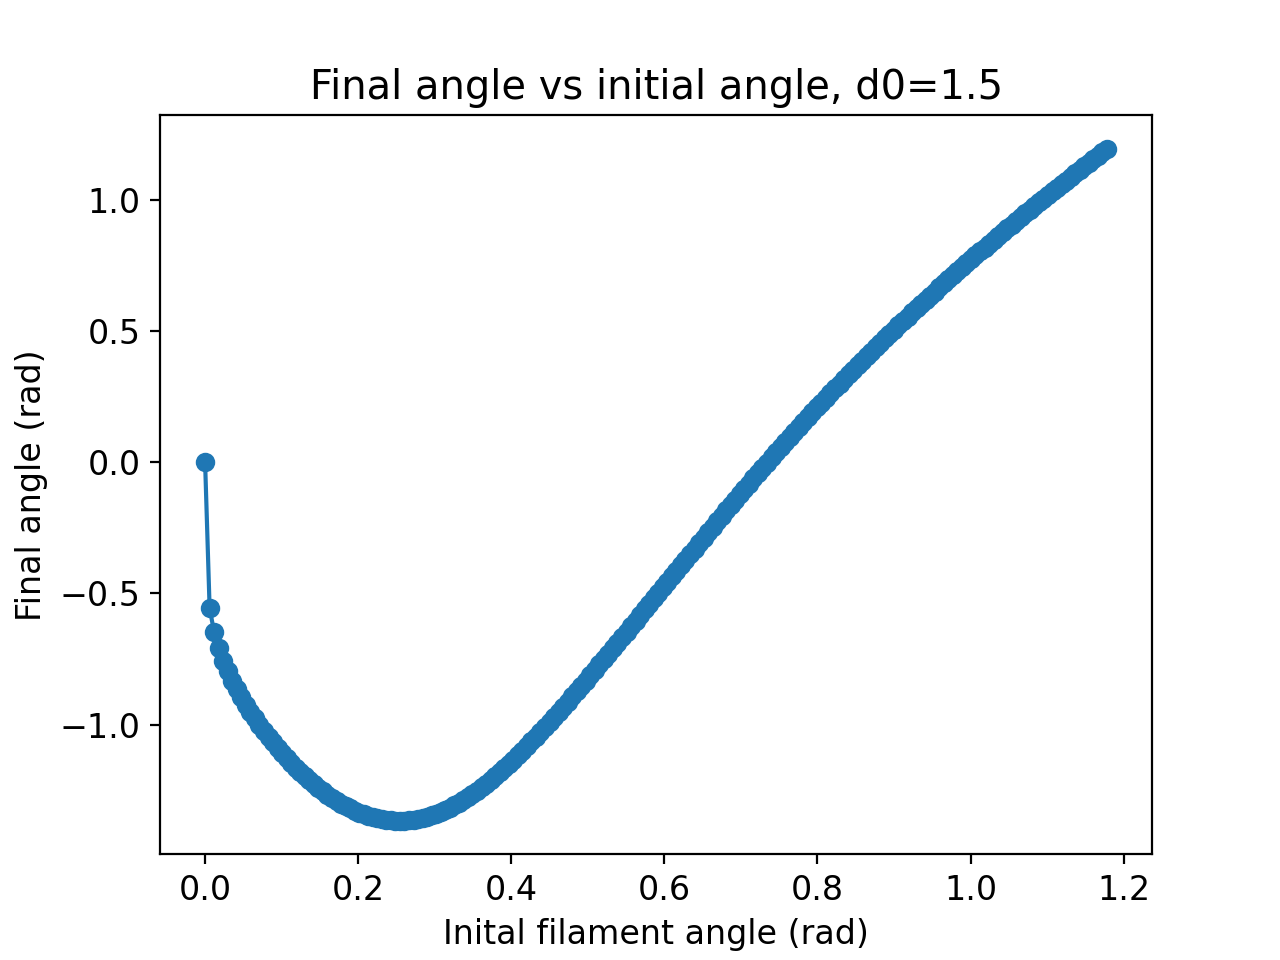

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_300_simType_point
Activity time 300
PotDipole strength 1.5
1.0833758602590033


<IPython.core.display.Javascript object>


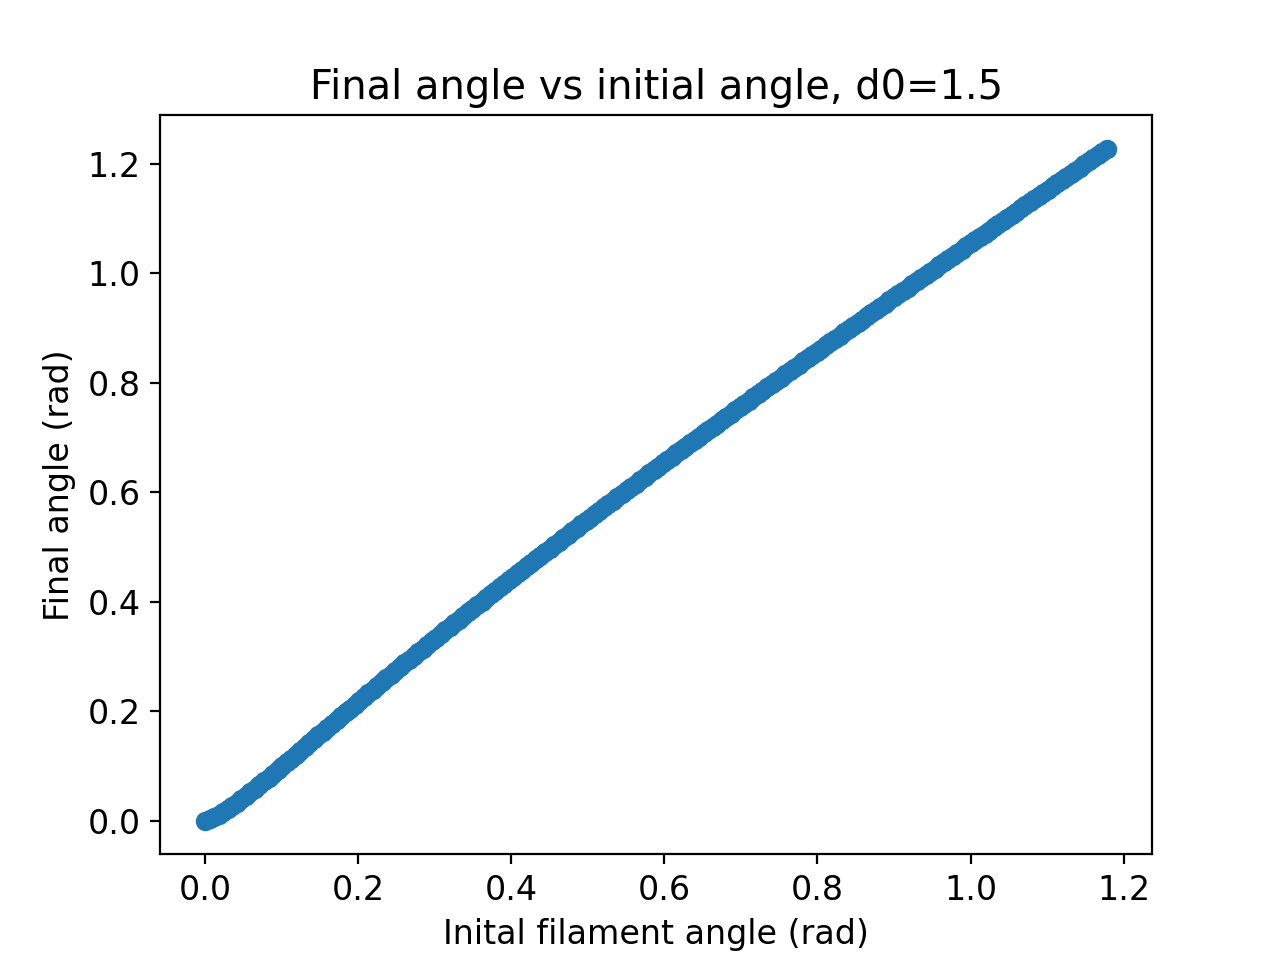

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_800_simType_point
Activity time 800
PotDipole strength 1.5
1.0833758509442348


<IPython.core.display.Javascript object>


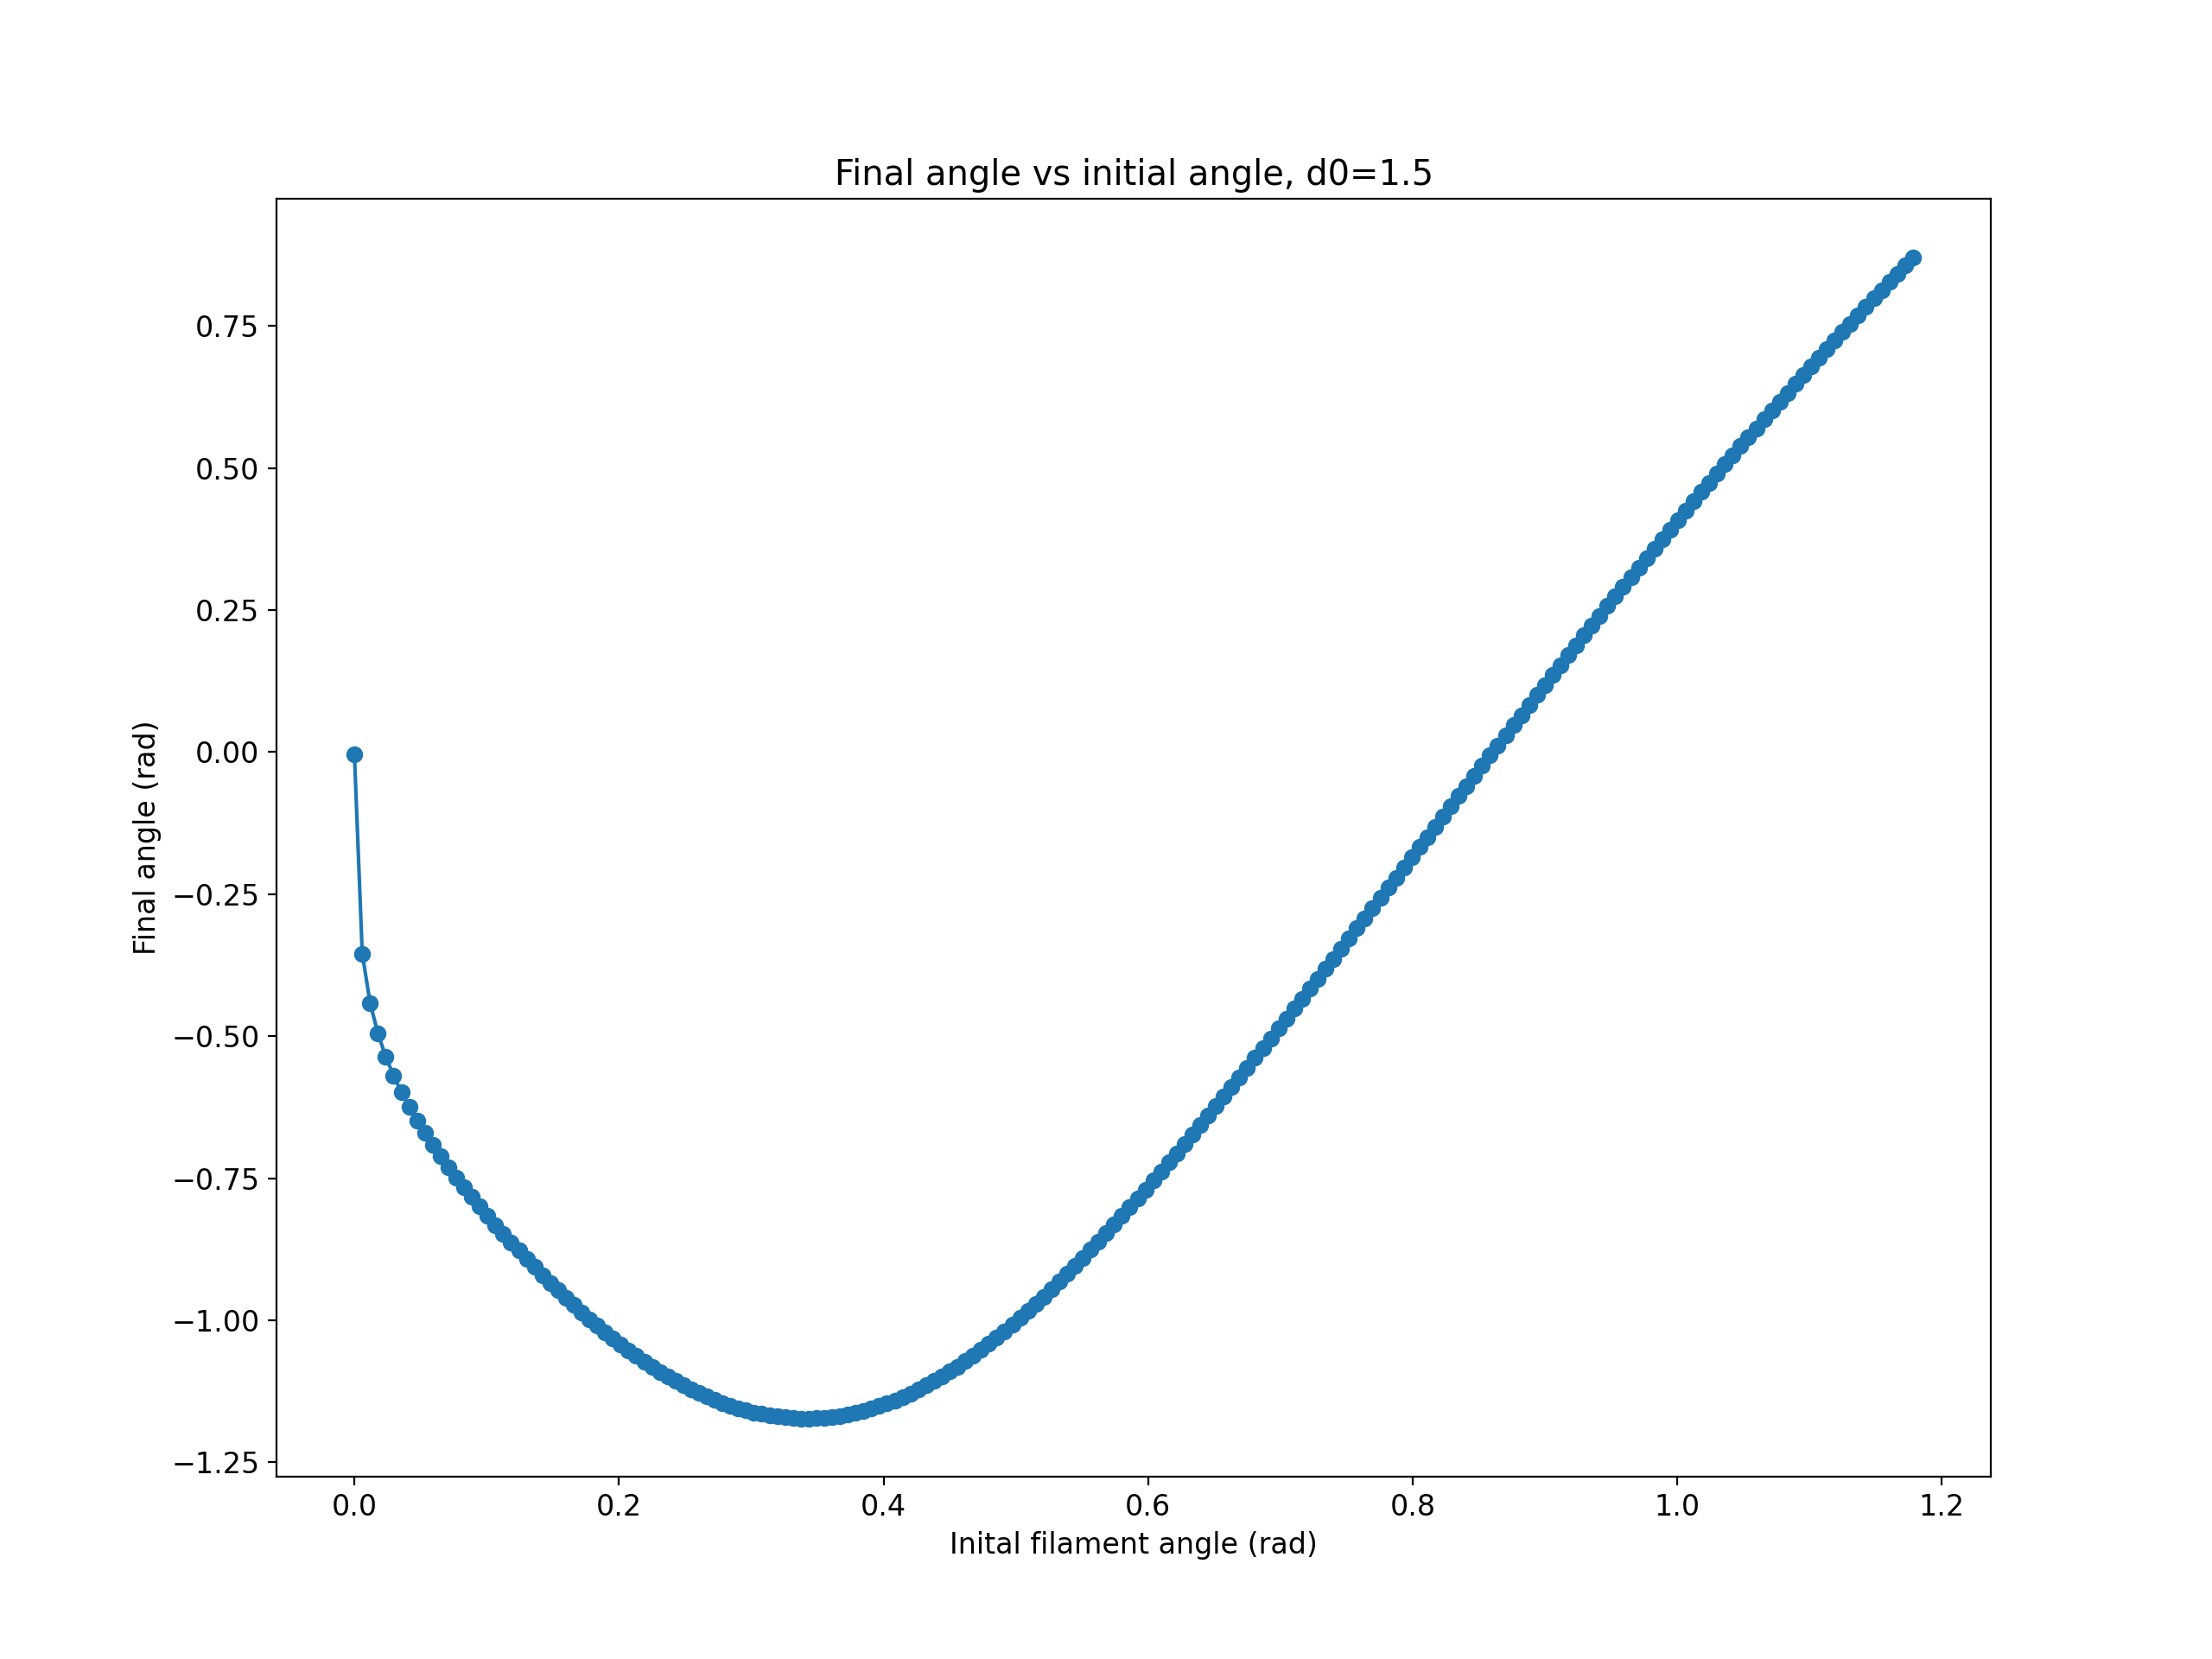

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_950_simType_point
Activity time 950
PotDipole strength 1.5
1.077455758748466


<IPython.core.display.Javascript object>


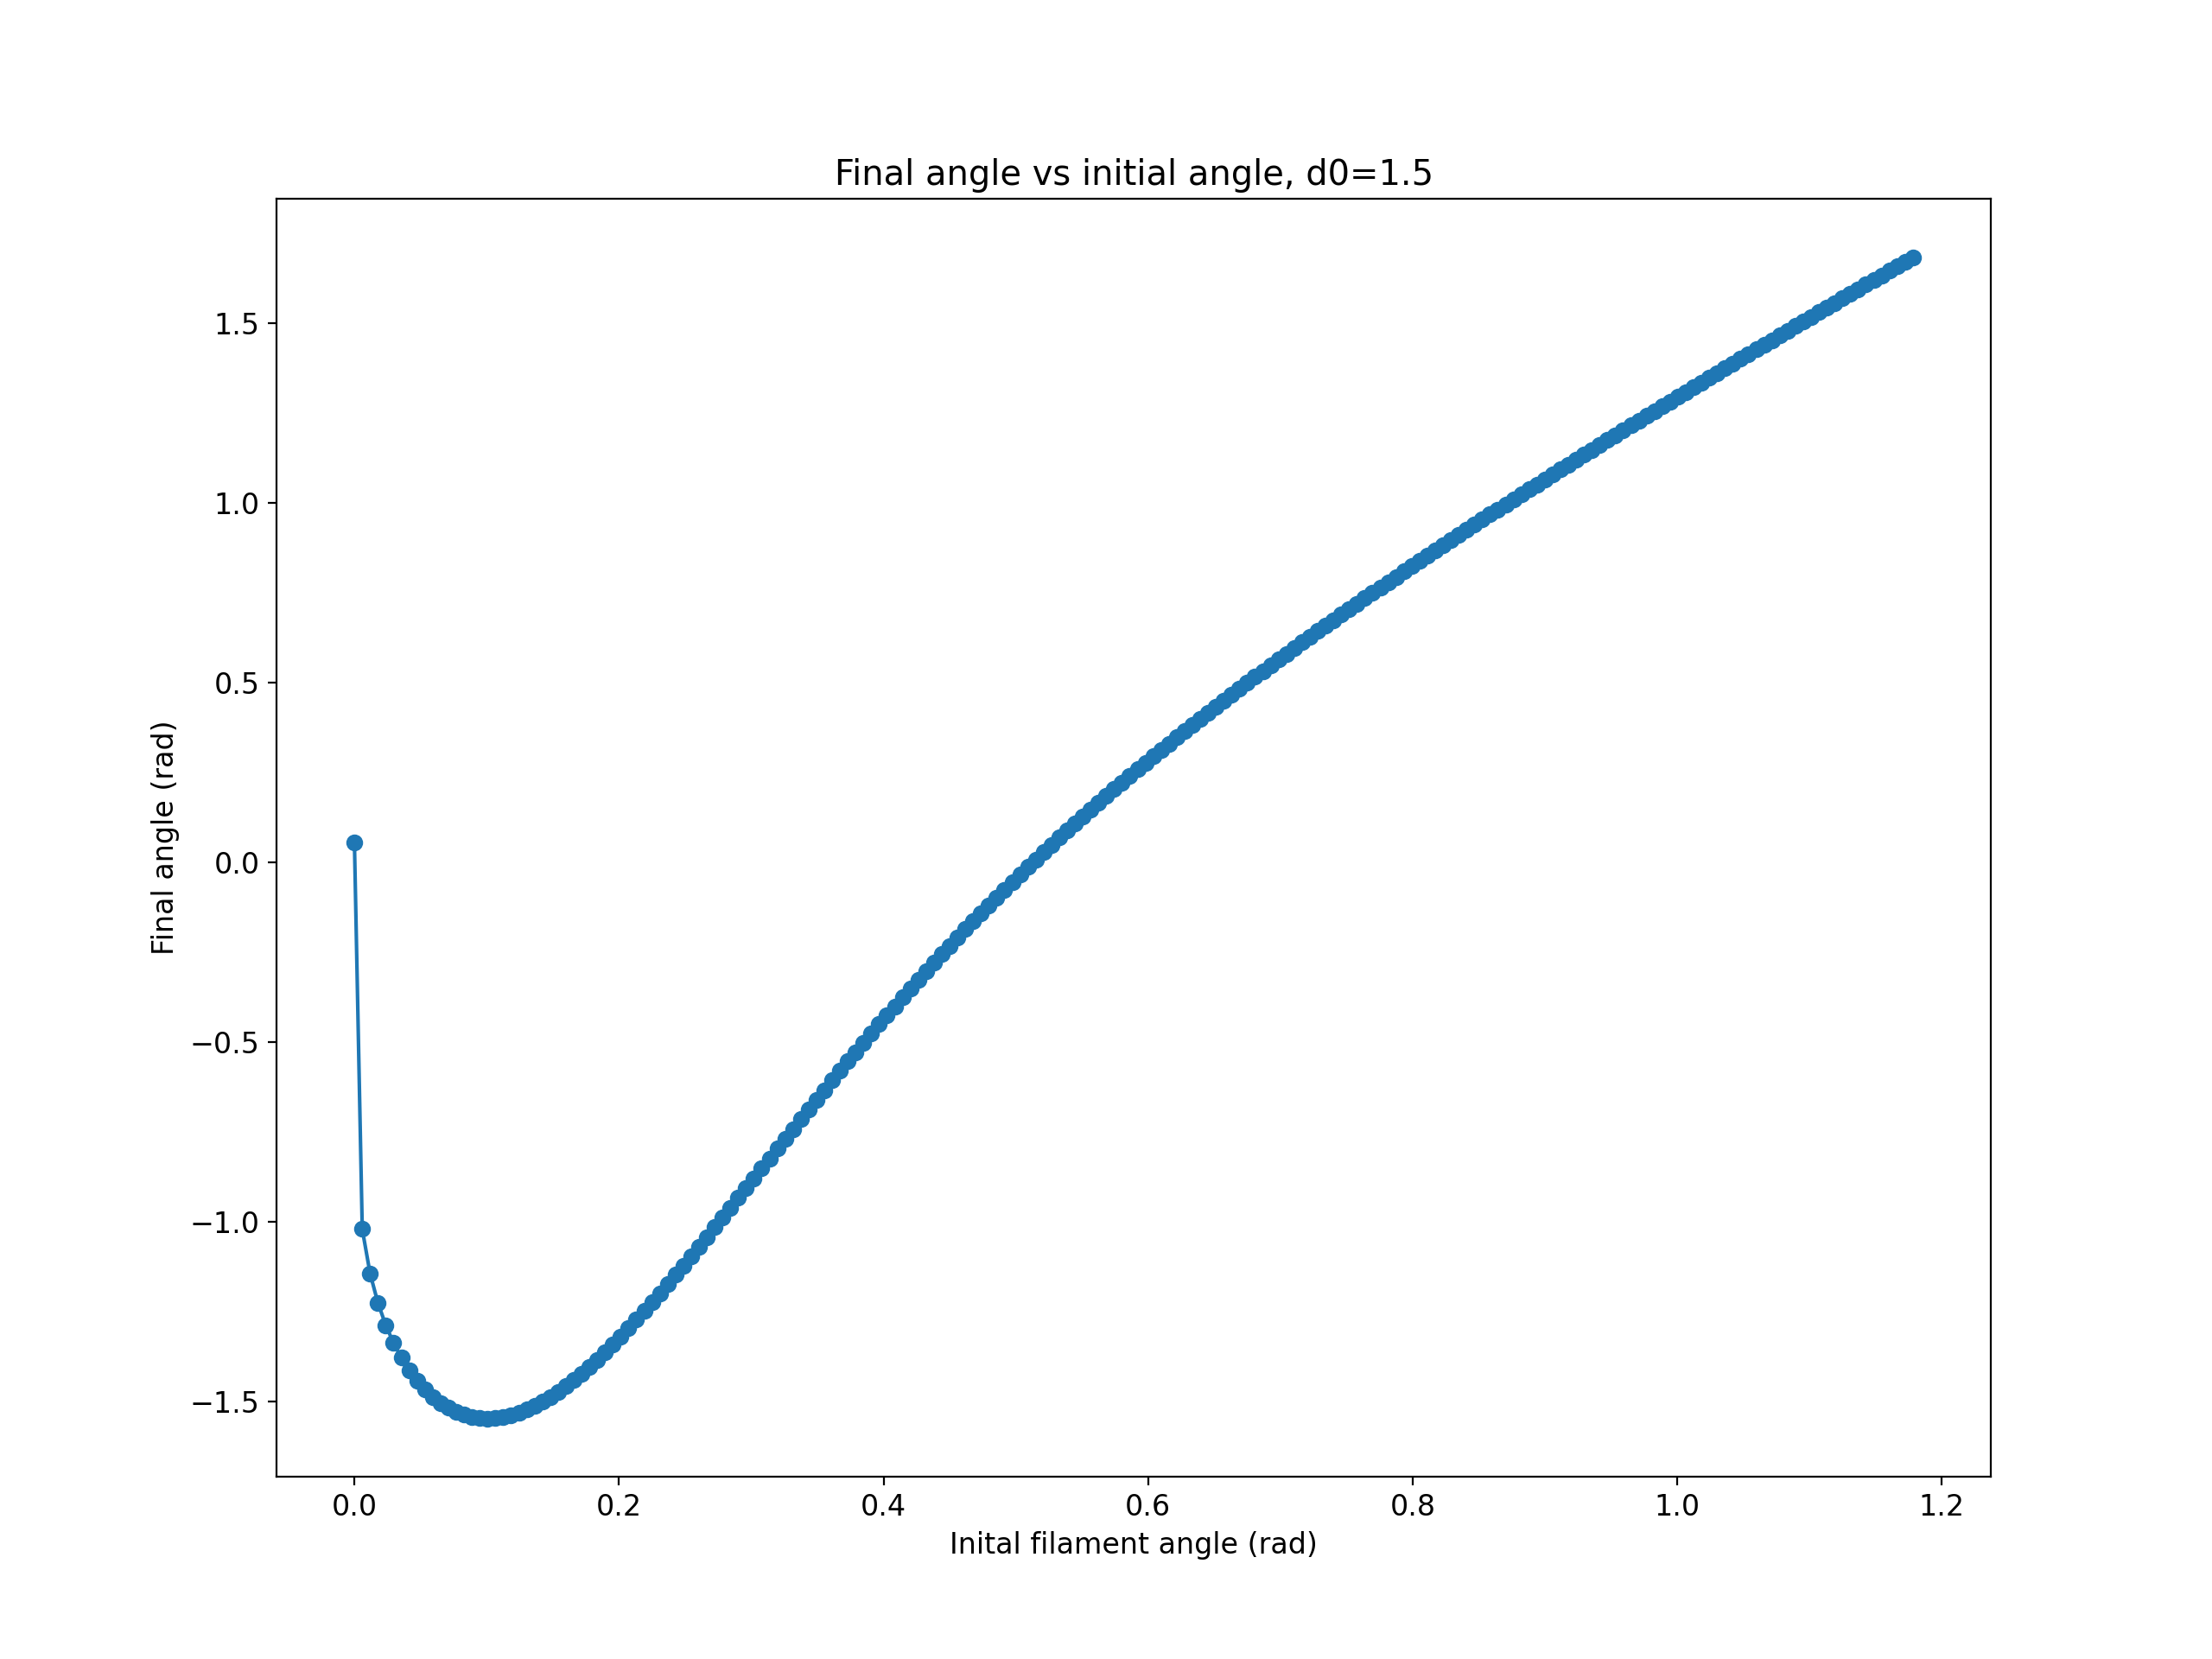

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_350_simType_point
Activity time 350
PotDipole strength 1.5
1.0833758487179617


<IPython.core.display.Javascript object>


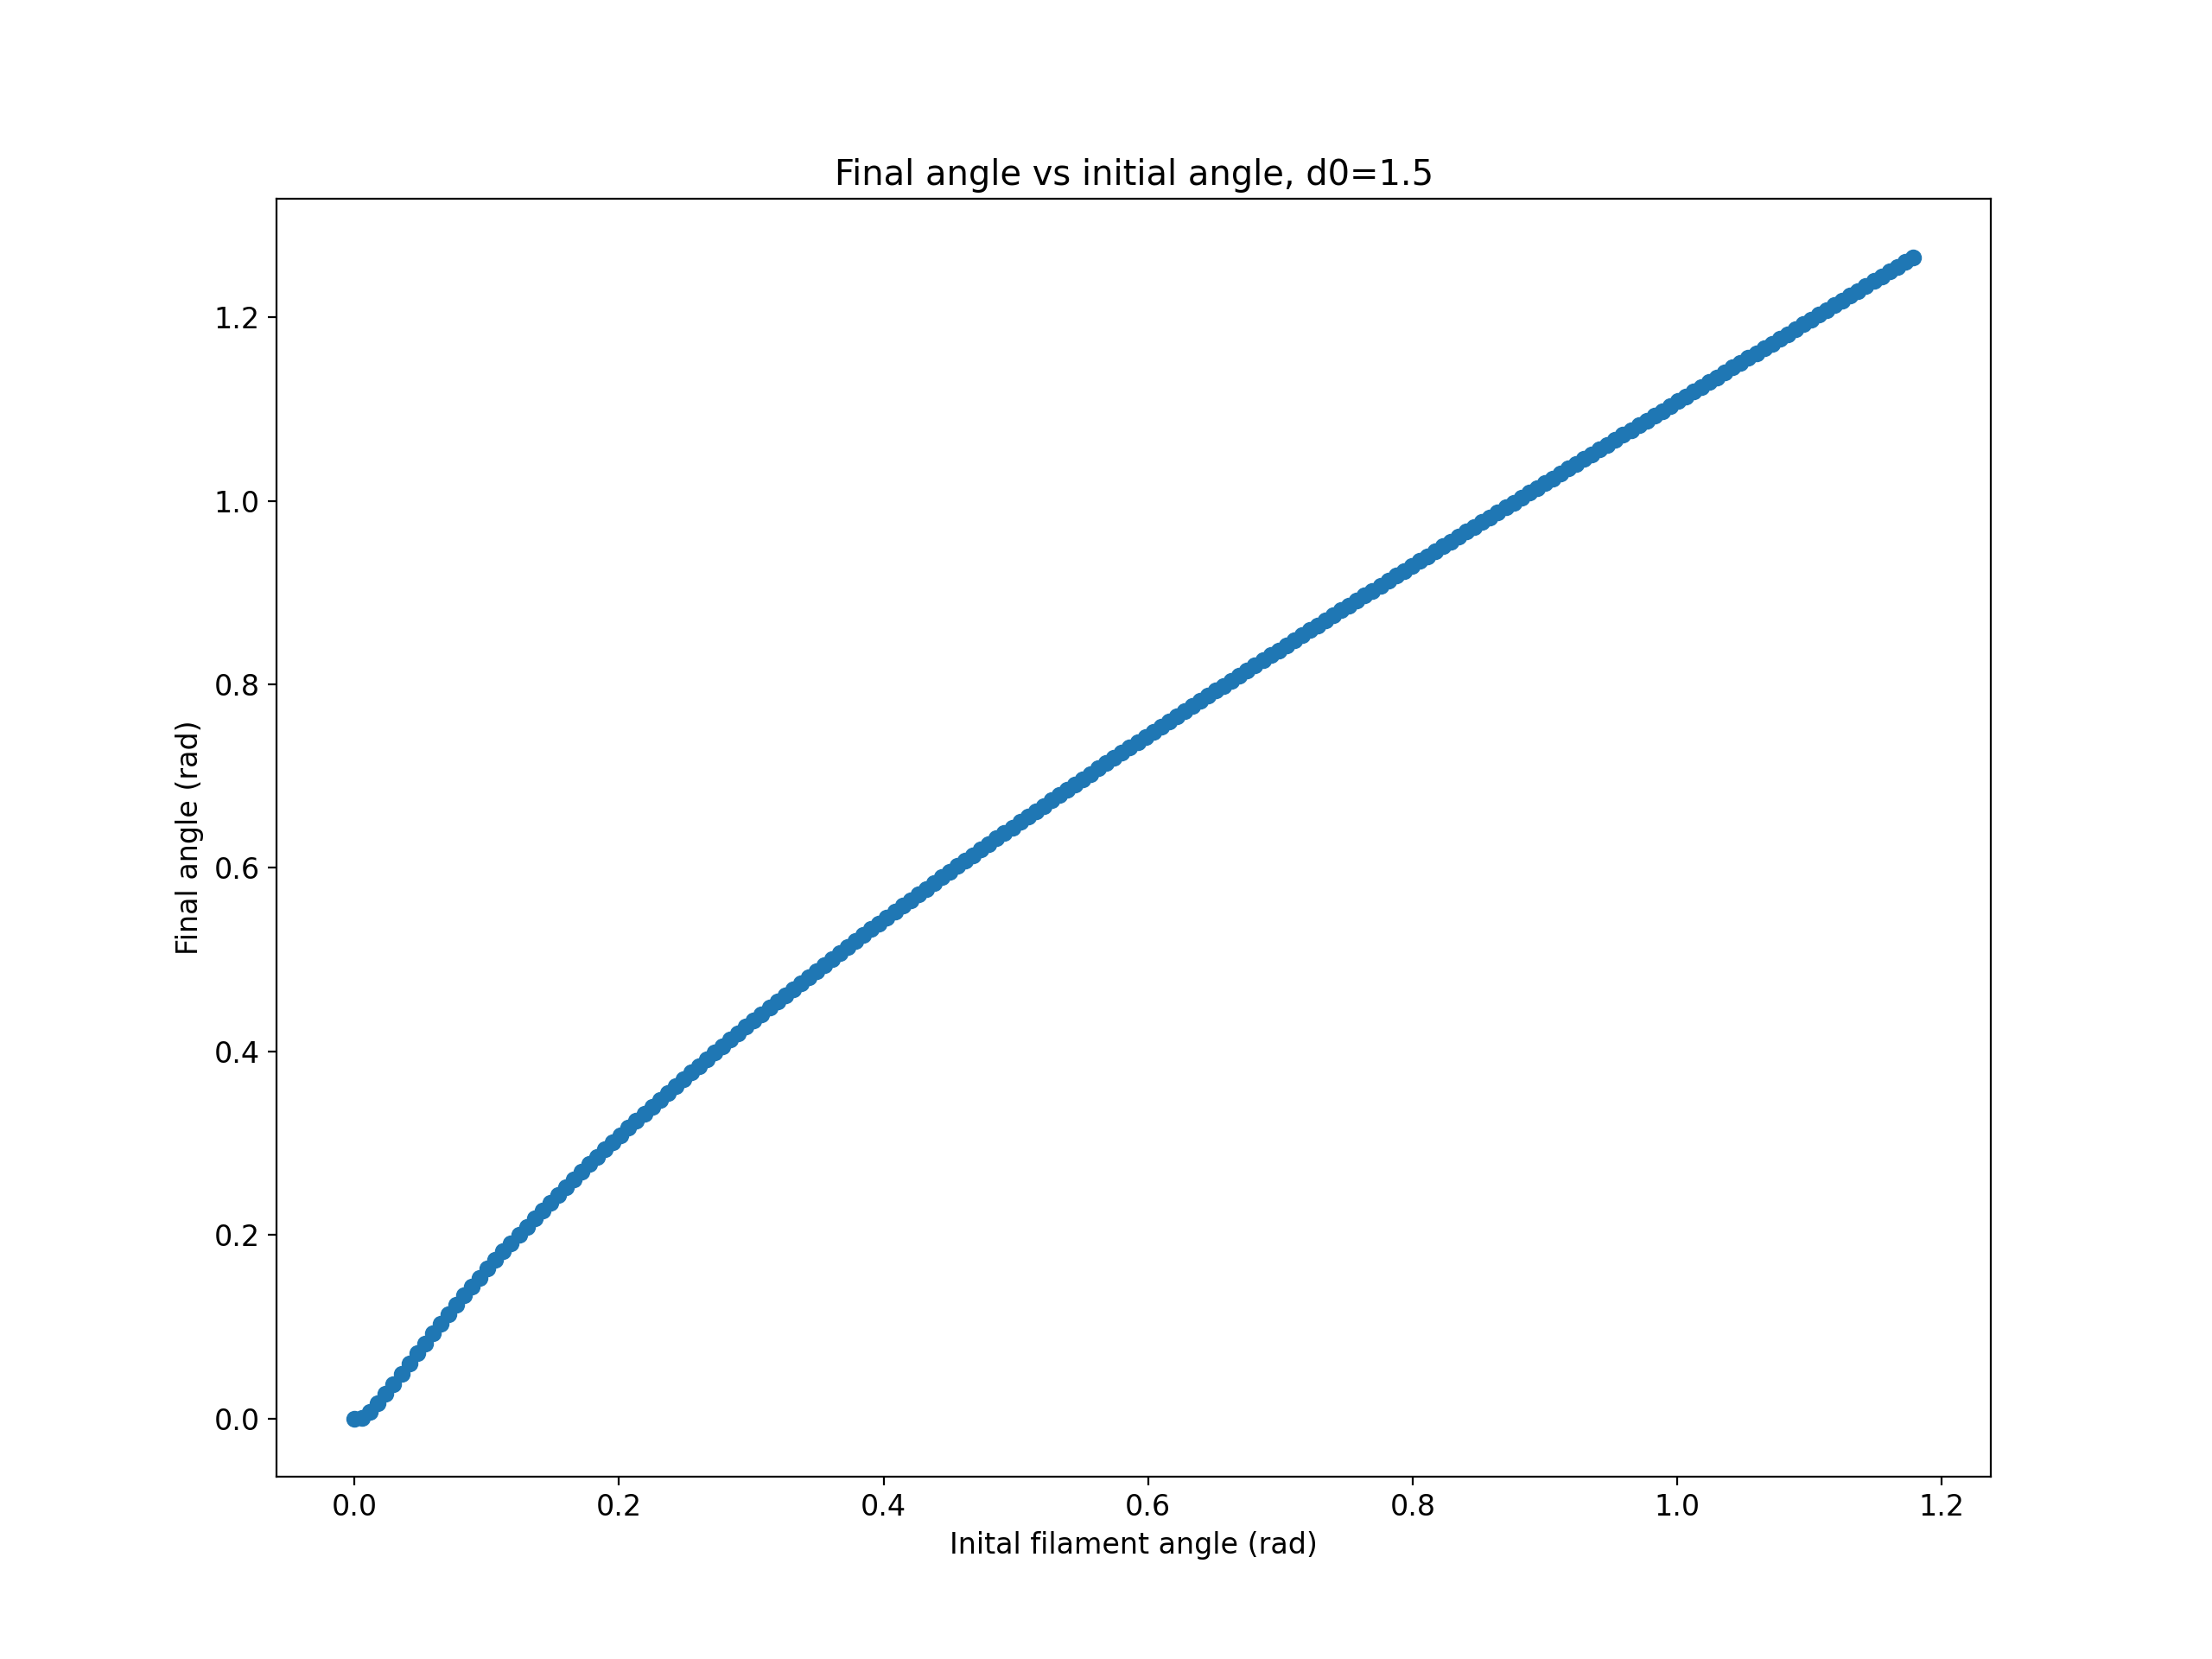

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_600_simType_point
Activity time 600
PotDipole strength 1.5
1.0833758614324964


<IPython.core.display.Javascript object>


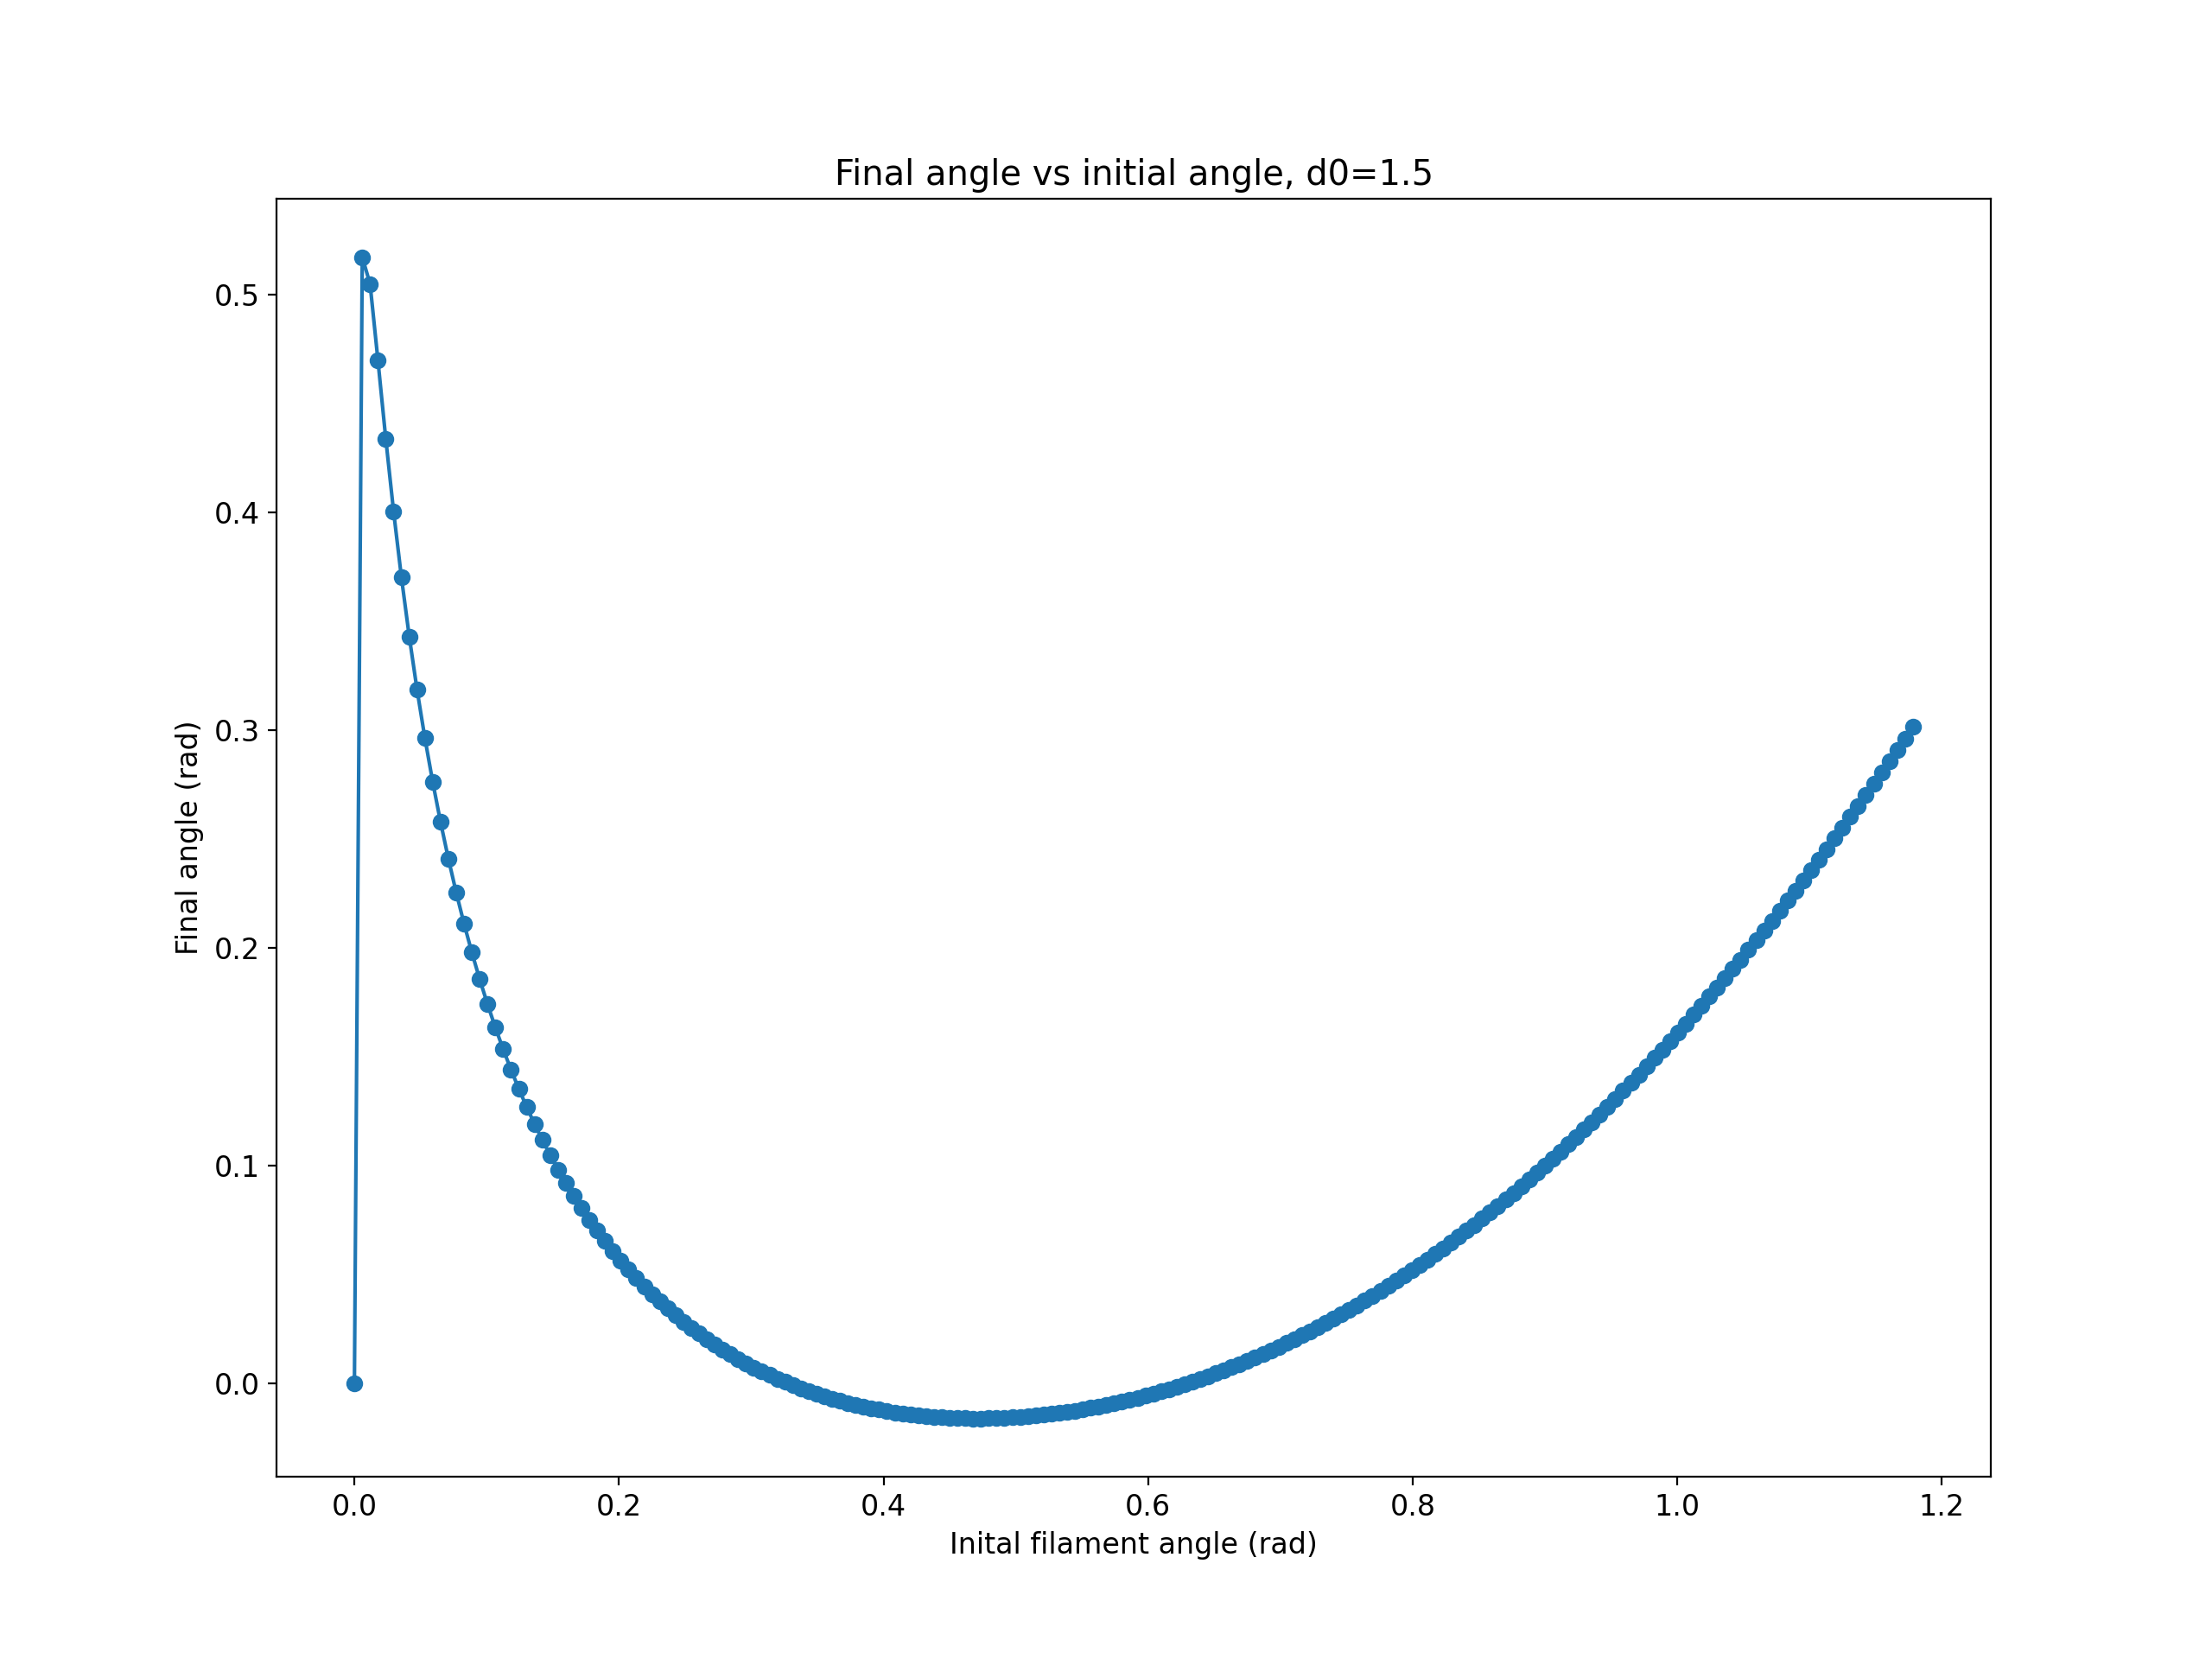

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.5
1.0833758635099506


<IPython.core.display.Javascript object>


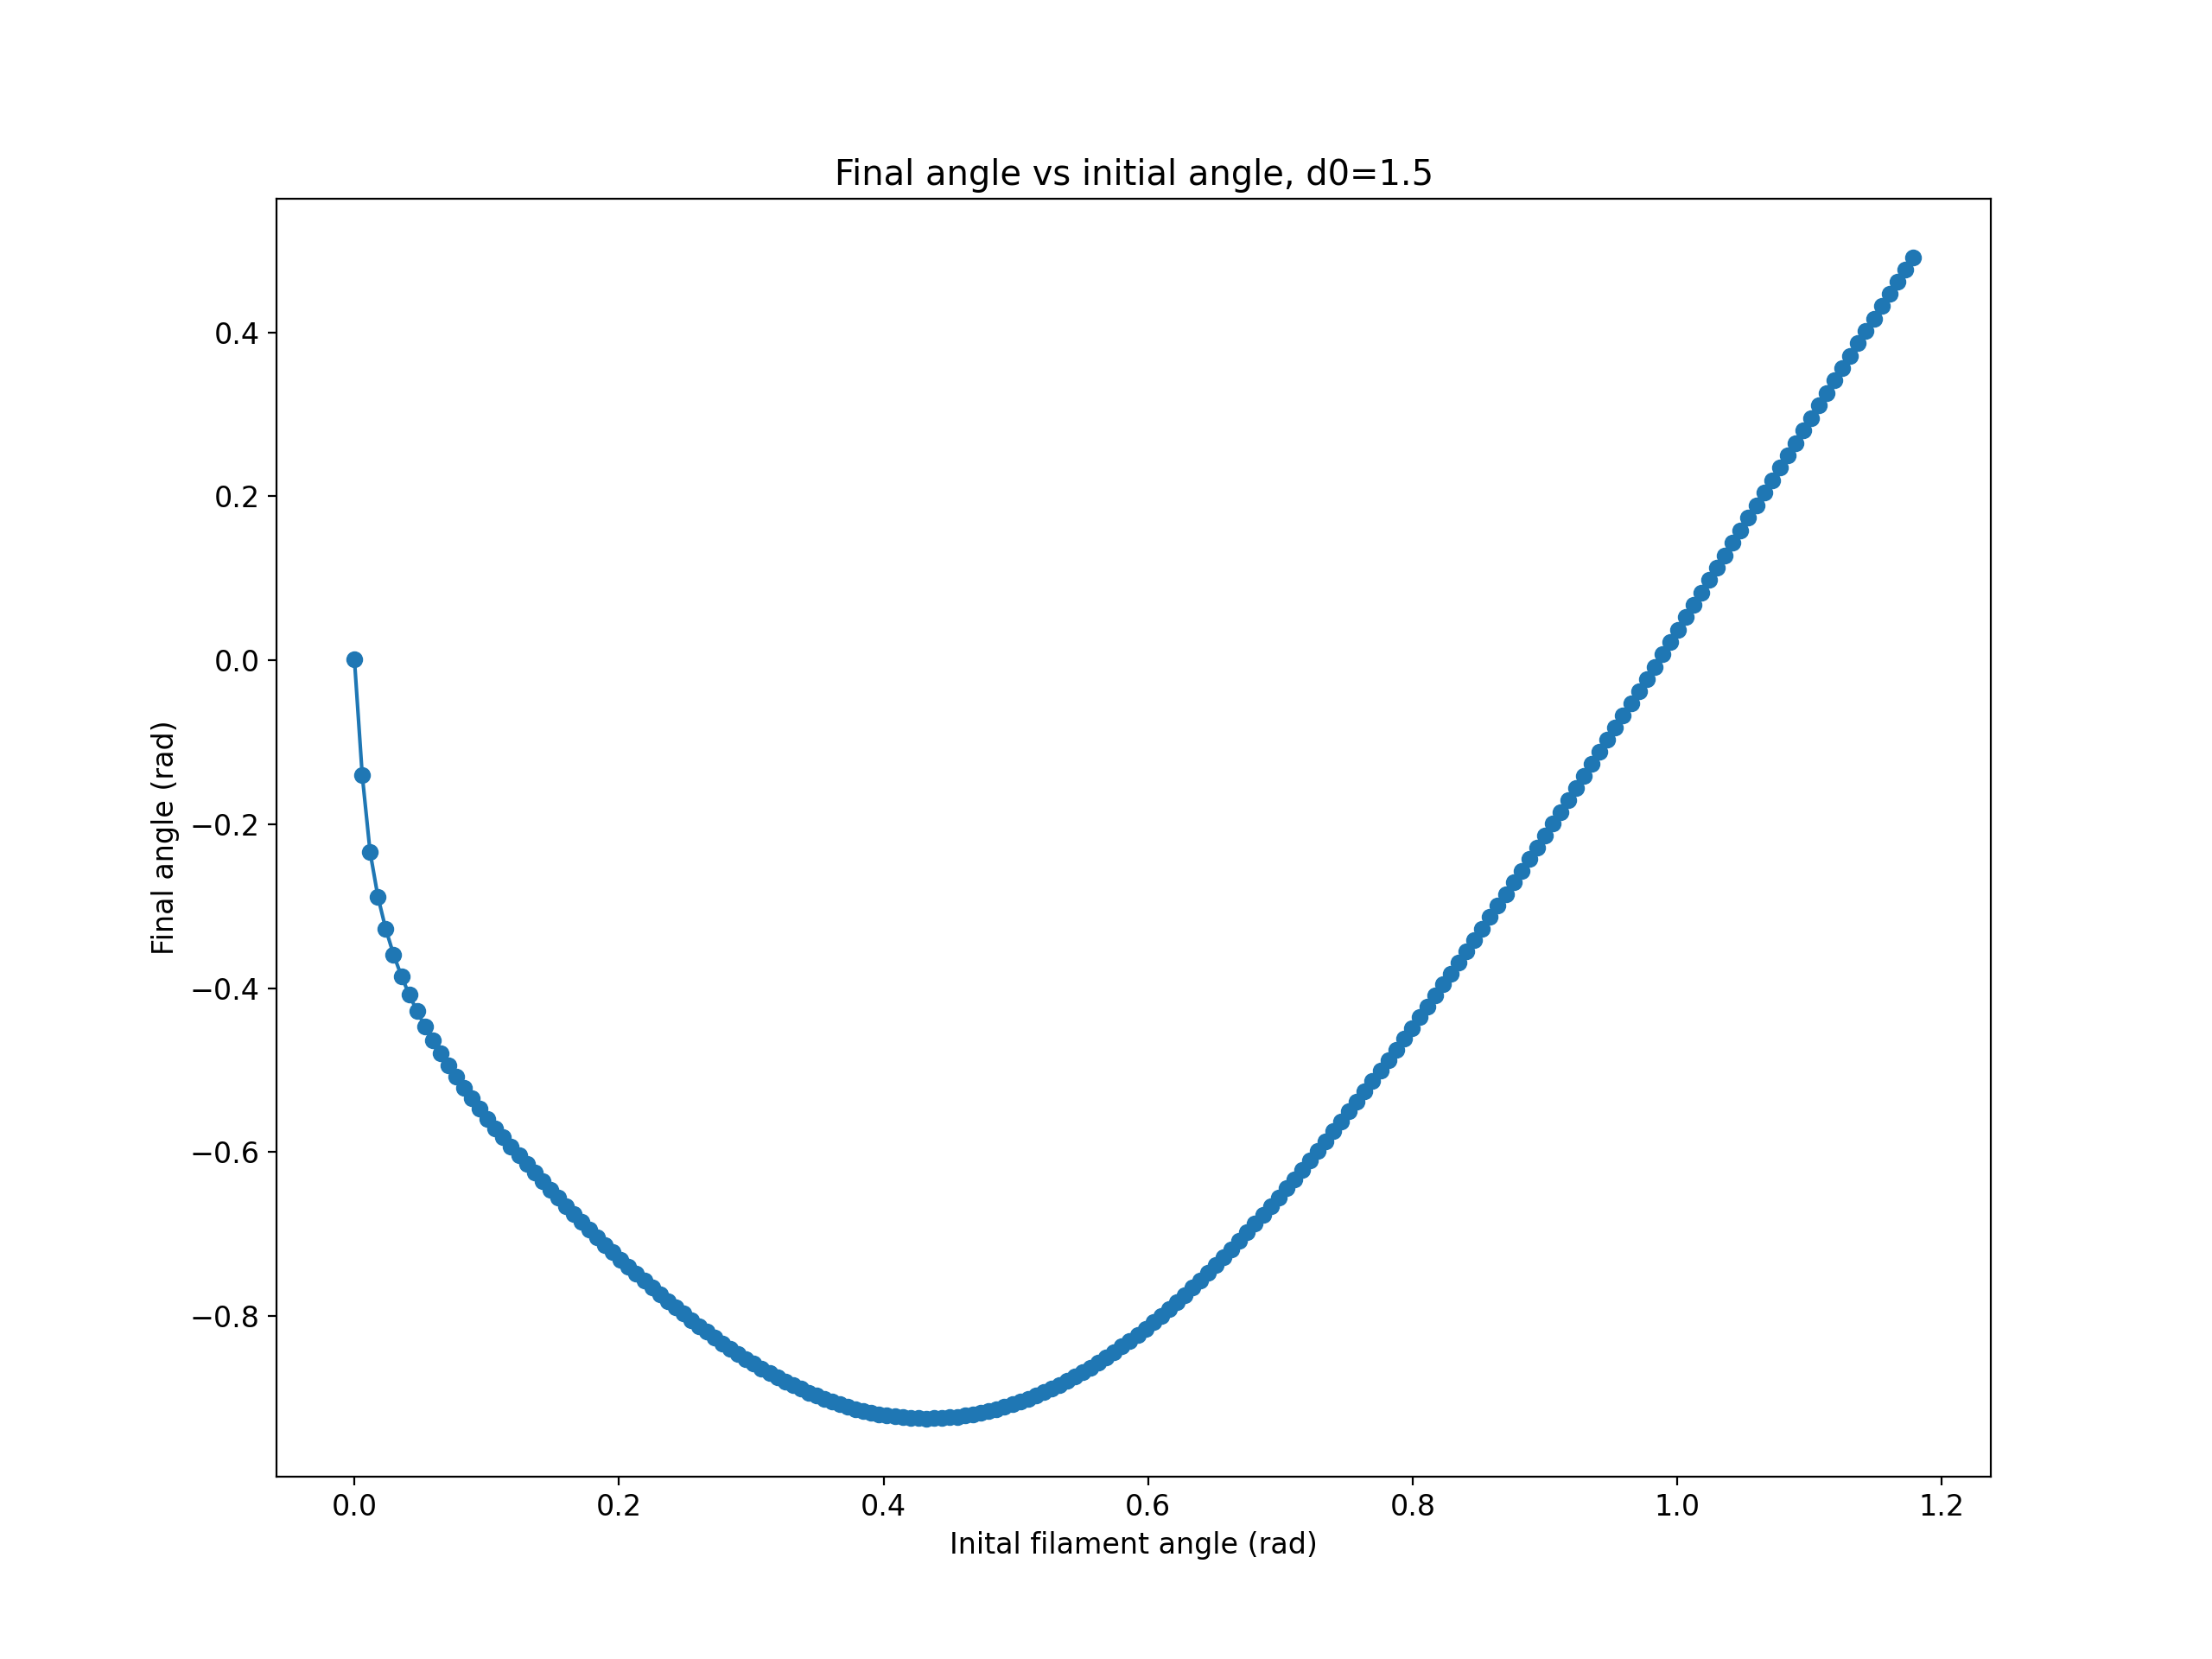

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_400_simType_point
Activity time 400
PotDipole strength 1.5
1.0833758536885358


<IPython.core.display.Javascript object>


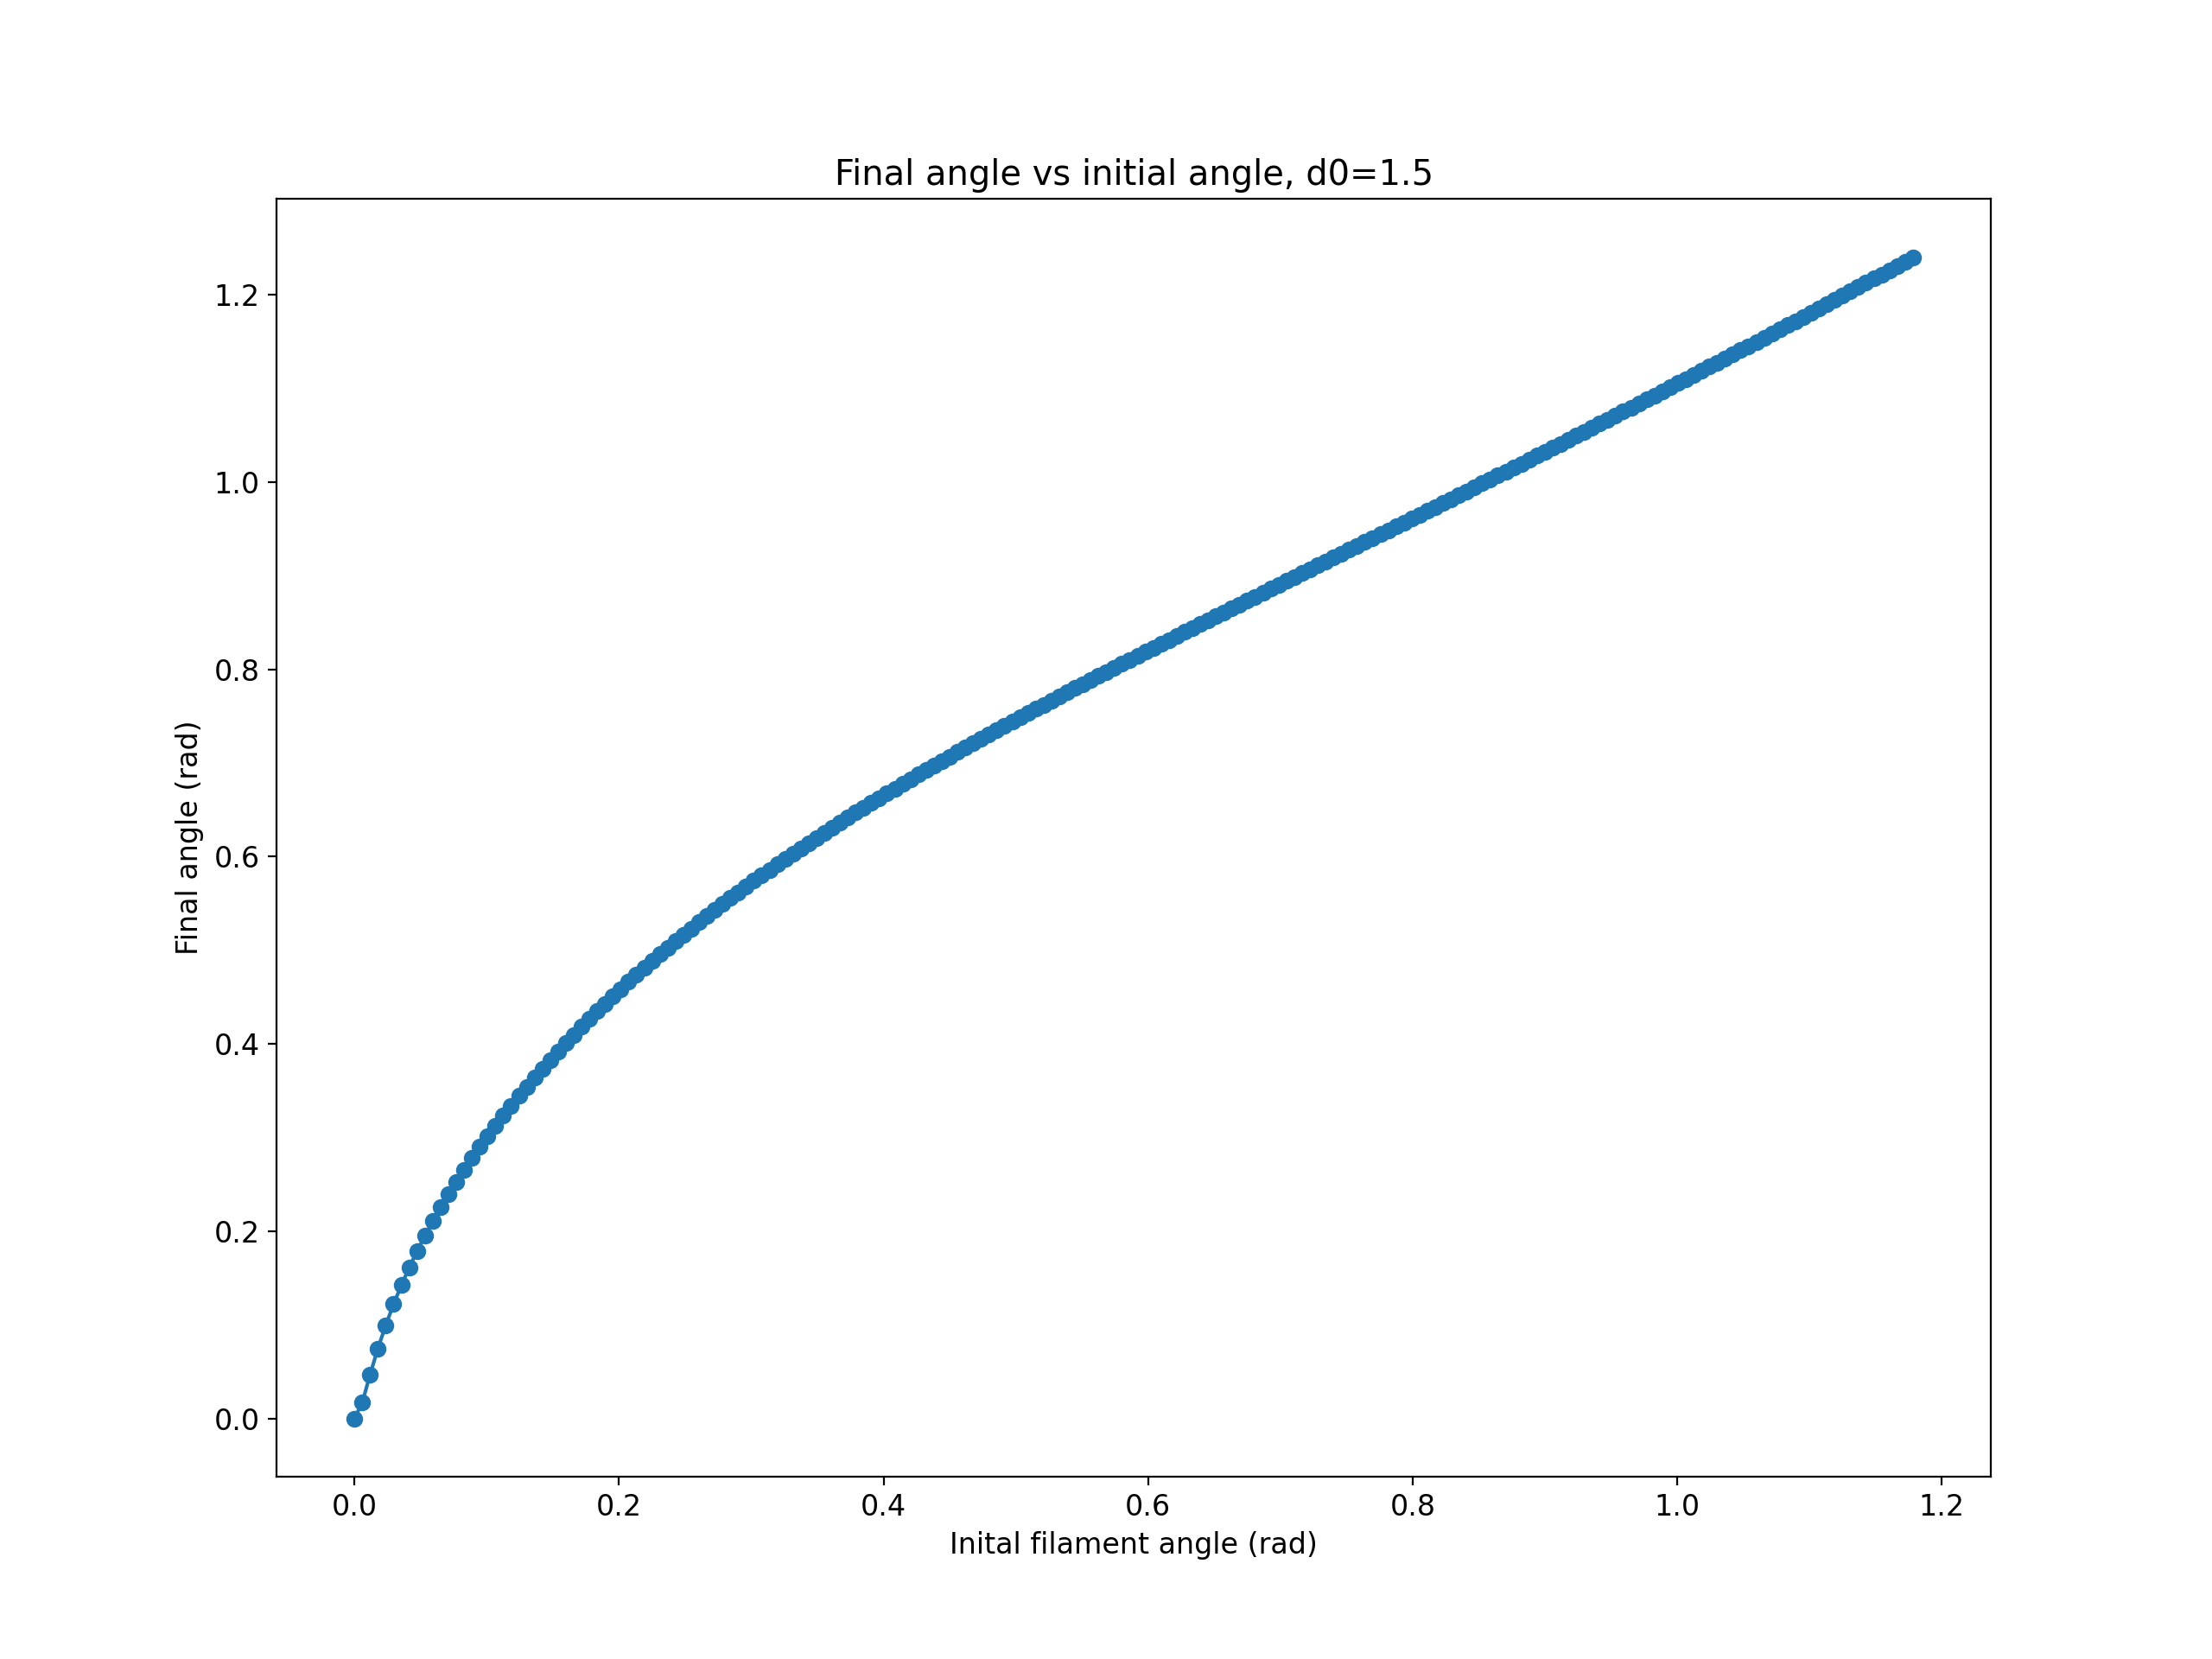

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_650_simType_point
Activity time 650
PotDipole strength 1.5
1.0774557683589132


<IPython.core.display.Javascript object>


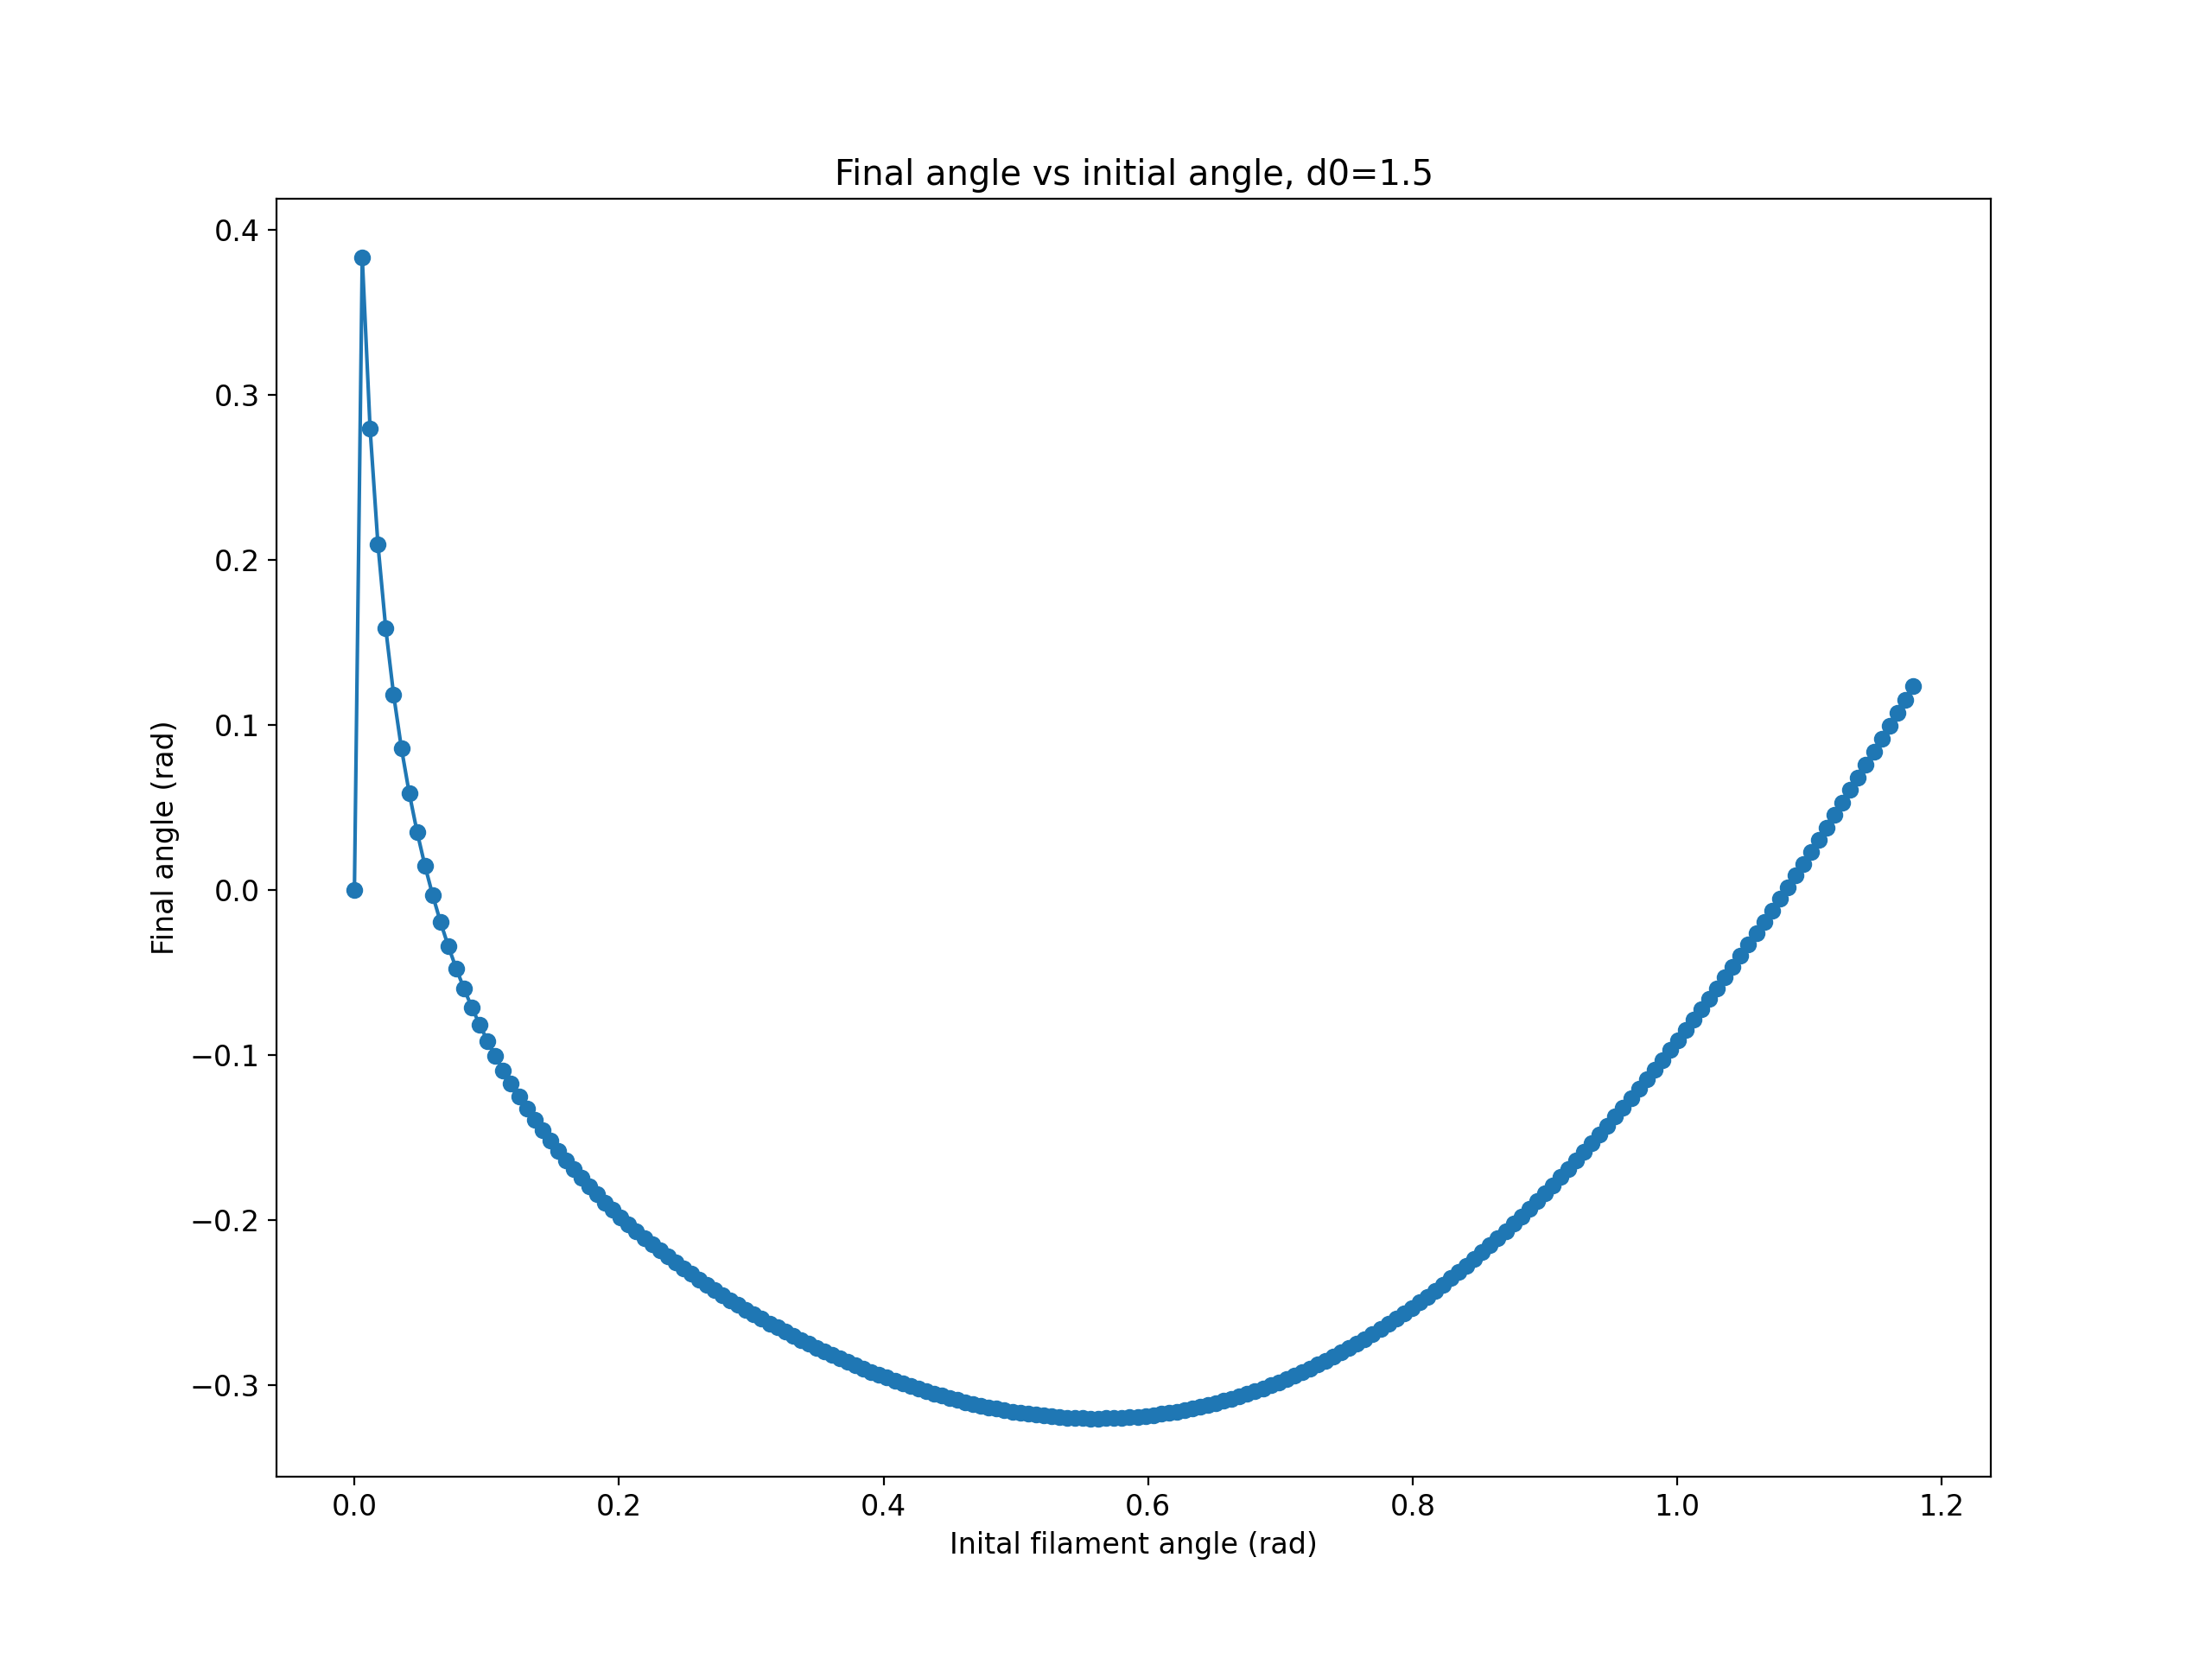

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_900_simType_point
Activity time 900
PotDipole strength 1.5
1.0833758593419862


<IPython.core.display.Javascript object>


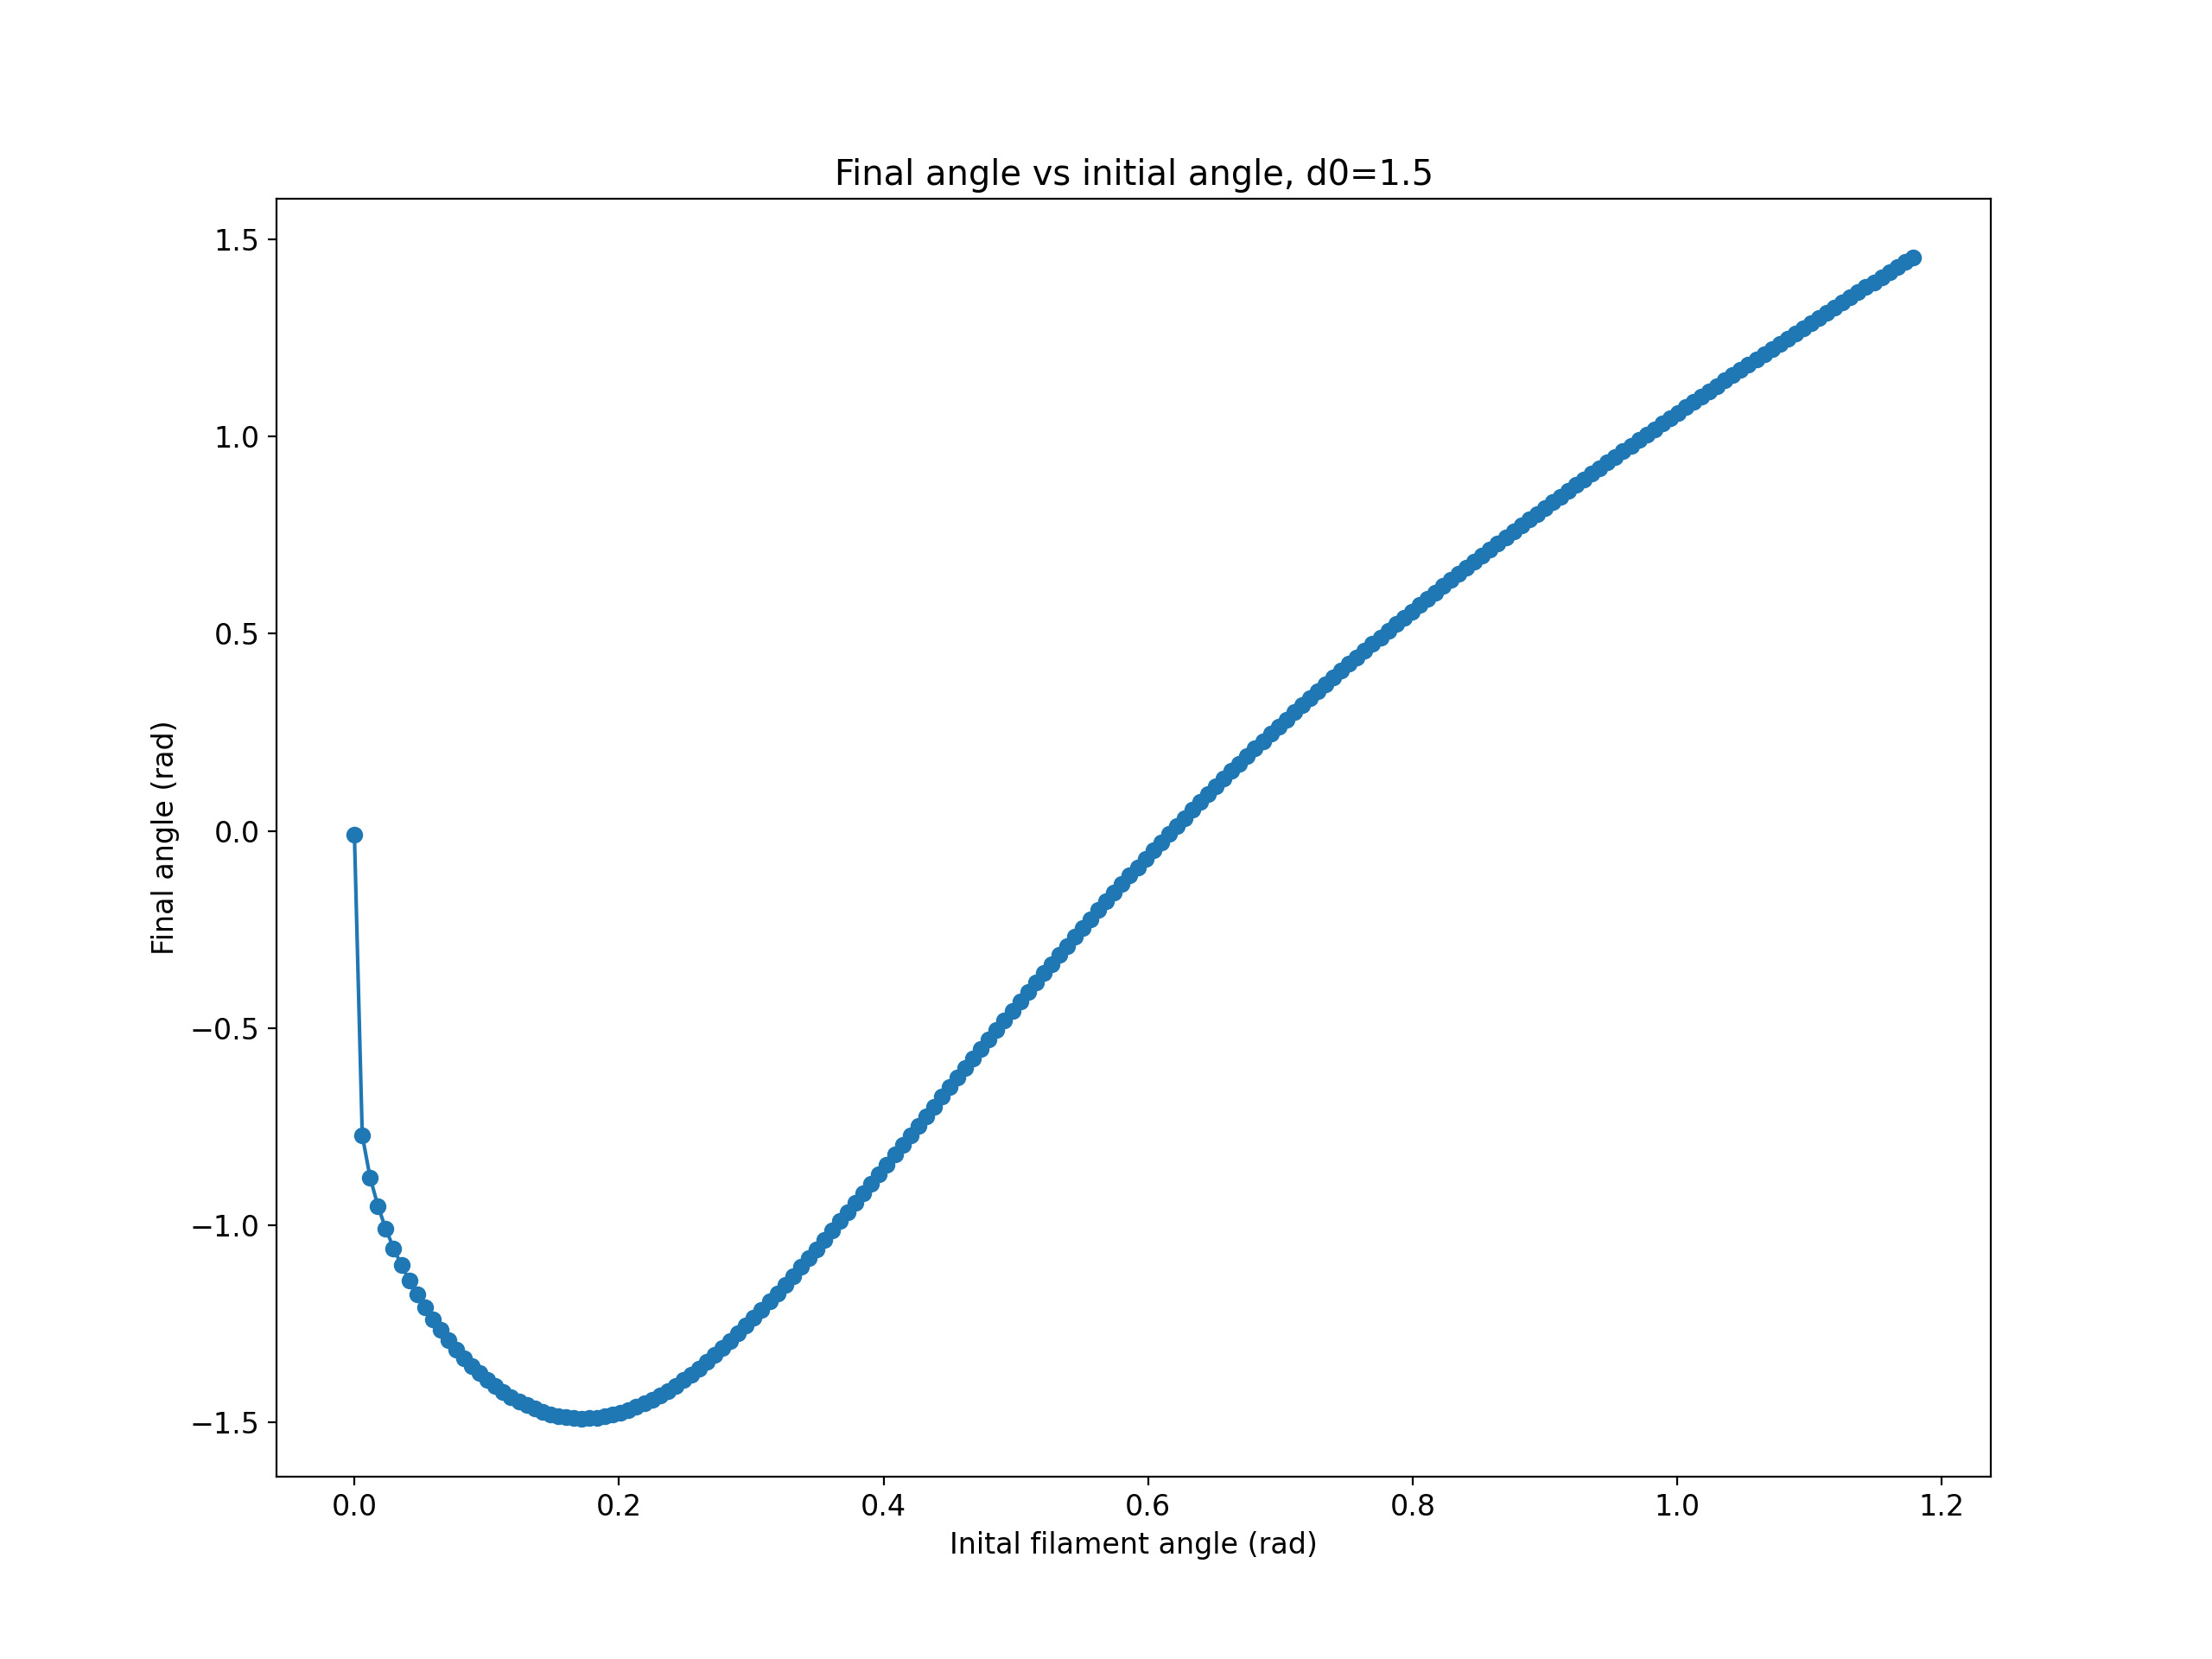

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_200_simType_point
Activity time 200
PotDipole strength 1.5
1.083375856191109


<IPython.core.display.Javascript object>


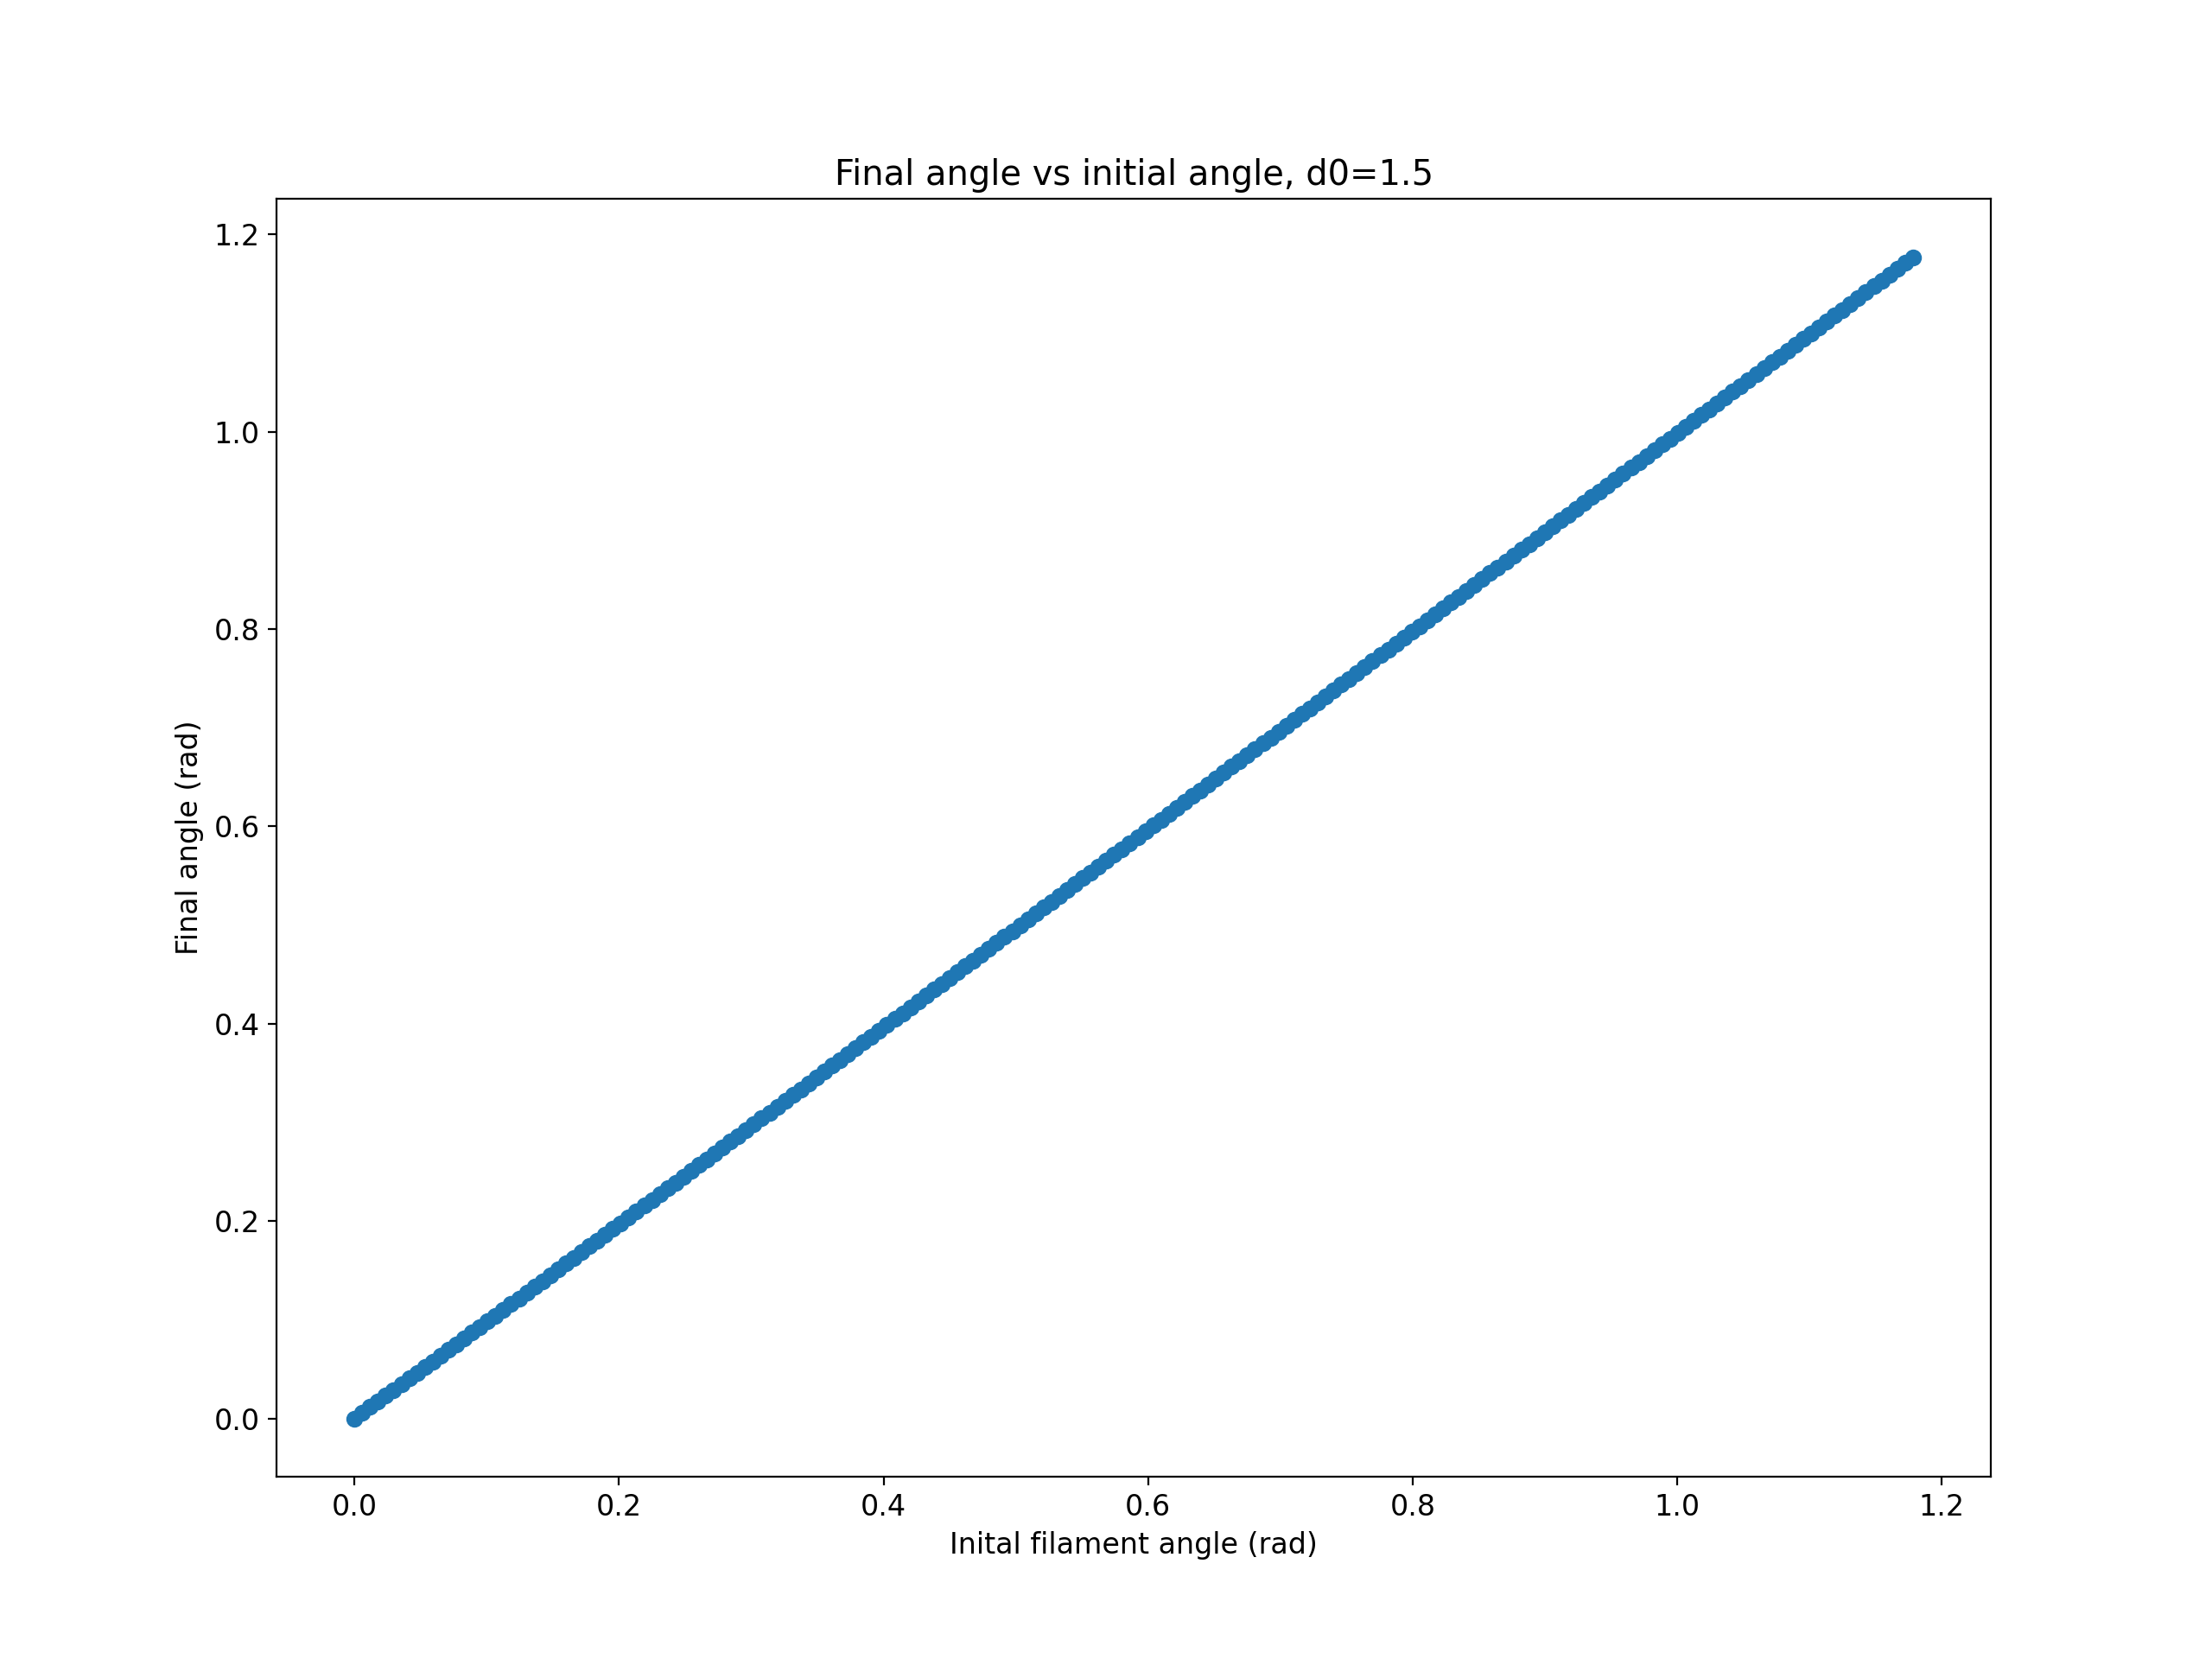

SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_550_simType_point
Activity time 550
PotDipole strength 1.5
1.0833758624815504


<IPython.core.display.Javascript object>


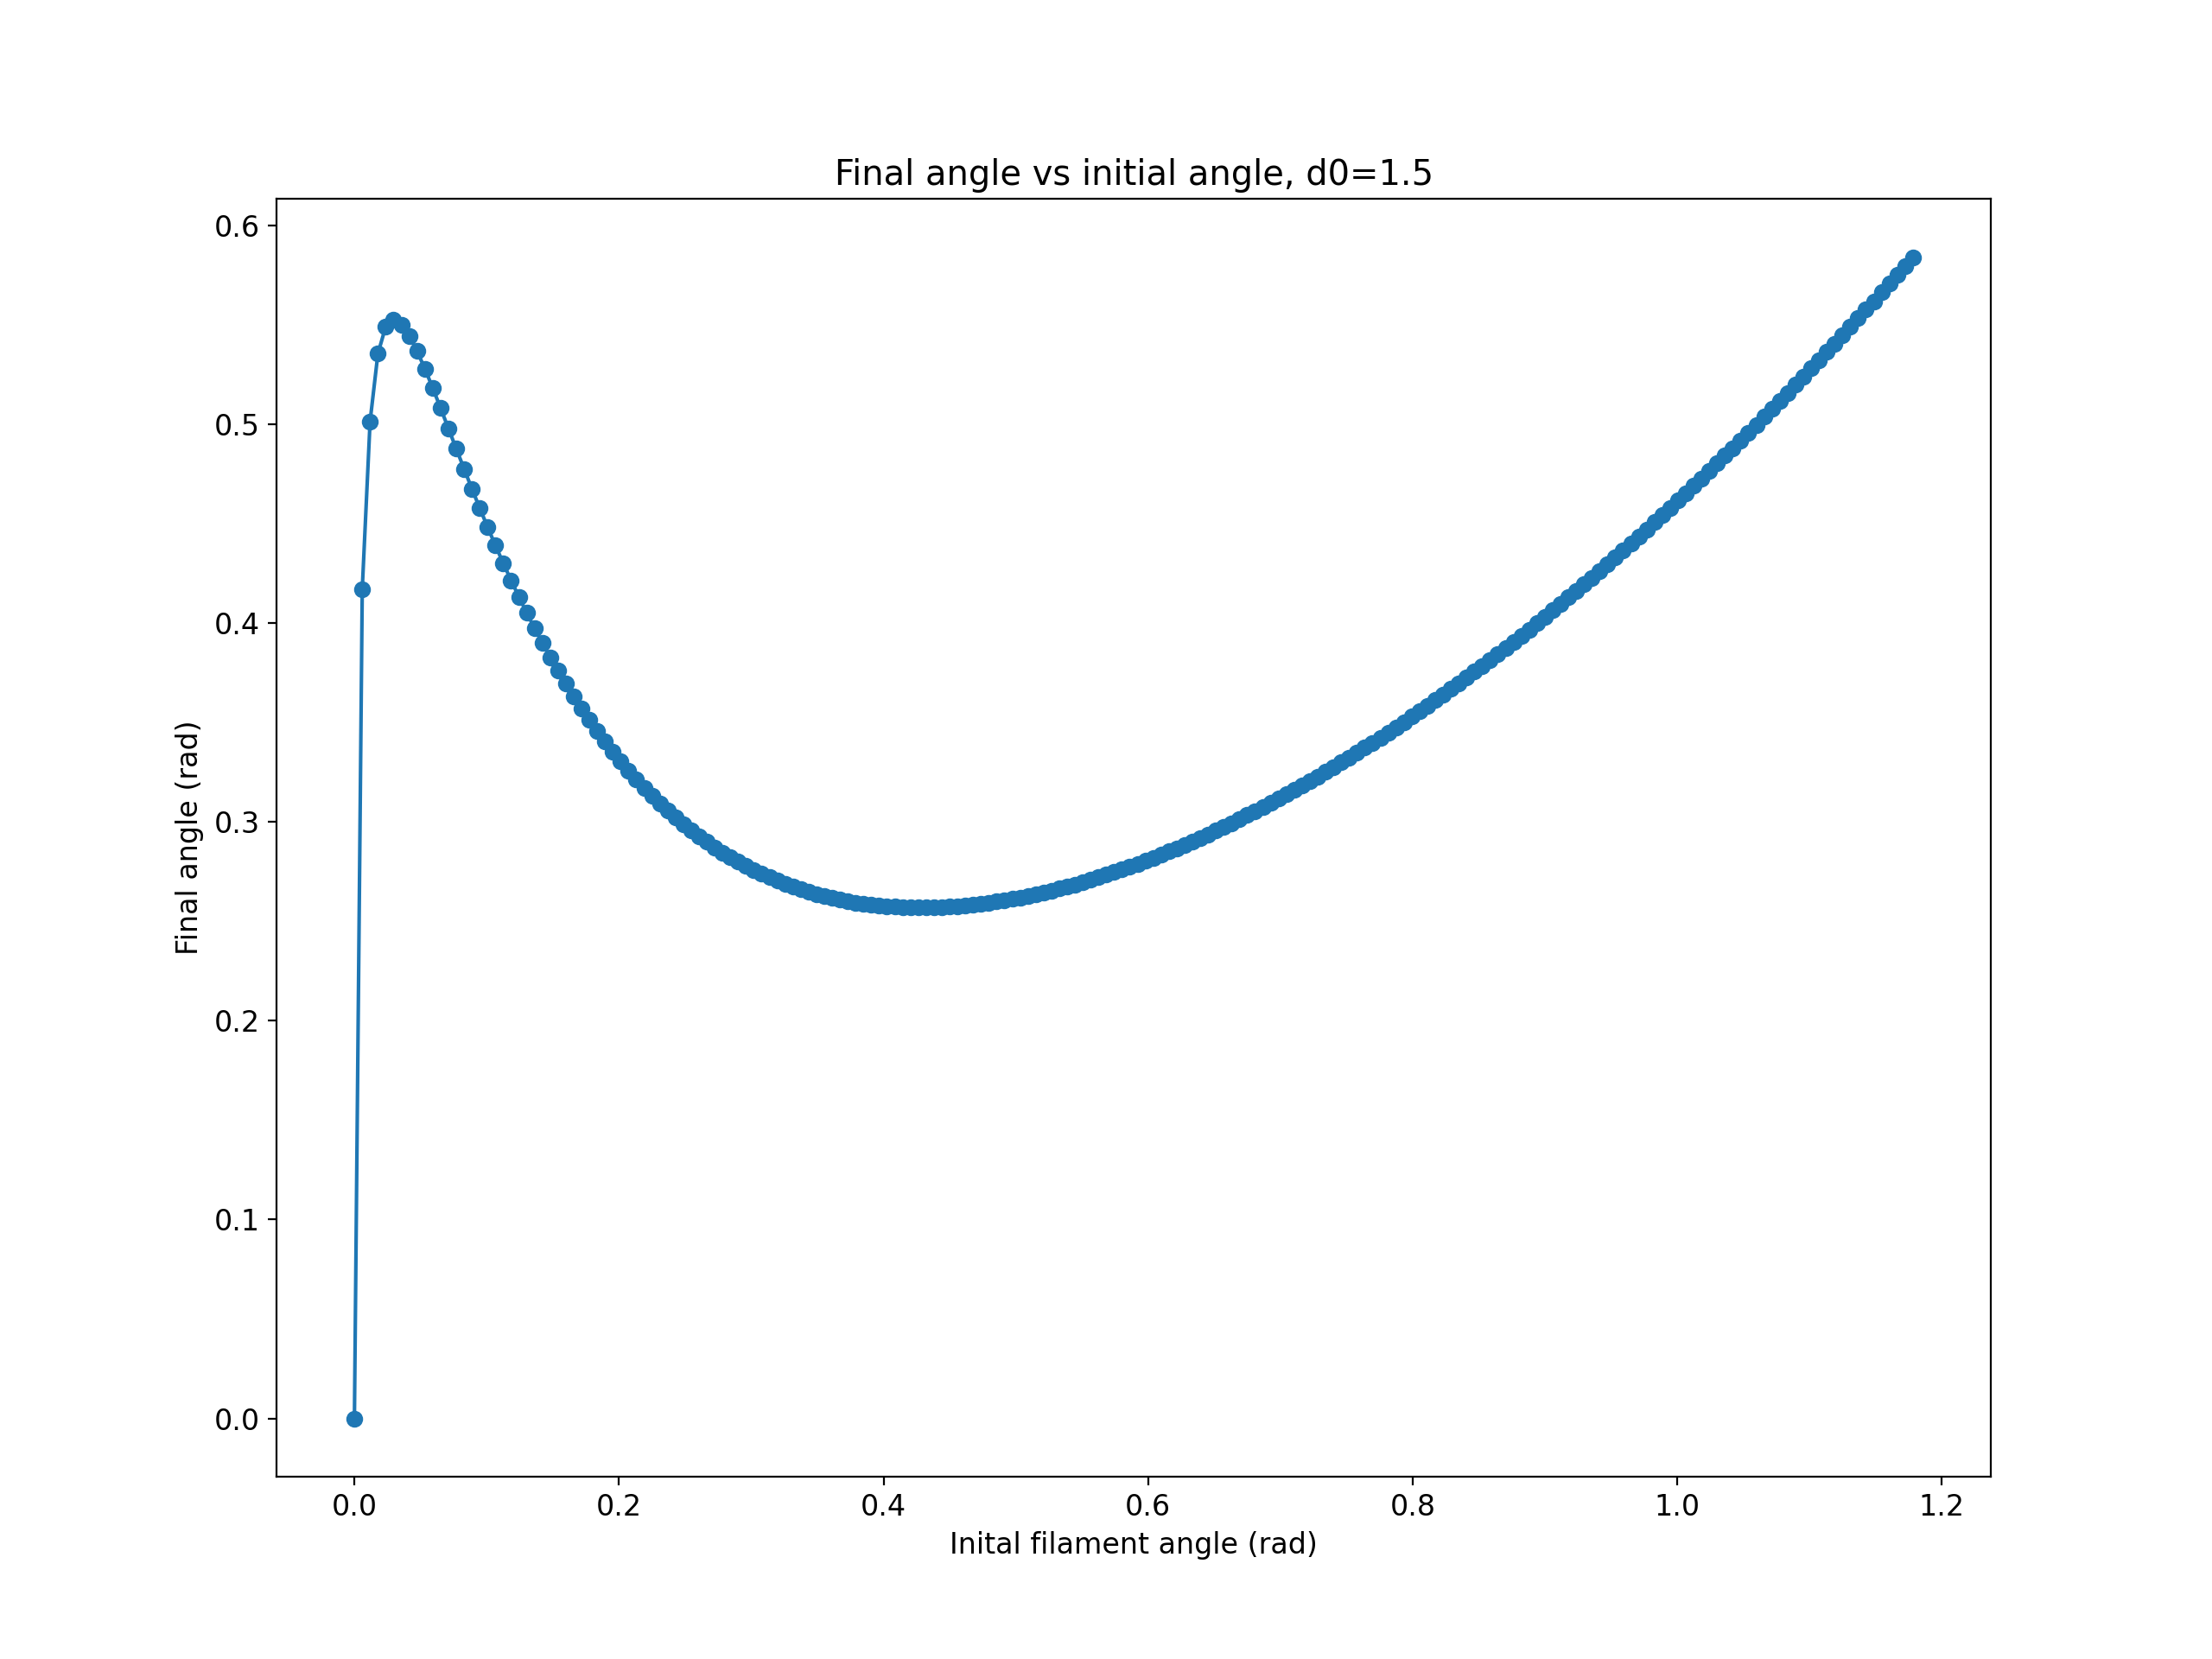

In [4]:
for folder in folders:
    print(folder)
    
    
    # Load metadata
    df_metadata = pd.read_csv(os.path.join(data_folder, folder, 'metadata.csv'))
    activity_timescale = df_metadata[' activity time scale'][0]
    k = df_metadata['spring constant'][0]
    d0 = df_metadata['potDipole strength'][0]
    print('Activity time', activity_timescale )
    print('PotDipole strength', d0)
    
    files = [file for file in os.listdir(os.path.join(data_folder, folder)) if file.endswith('hdf5')]
    # Allocate arrays to store the data
    init_angle_array = np.zeros(len(files))
    final_angle_array = np.zeros(len(files))
    
    
    # For each condition calculate buckling dynamics at different orientations
    for ii, file in enumerate(files):

        folder, *rest = os.path.split(os.path.join(data_folder, folder, file))
        filament = analysis.analysisTools(file = os.path.join(data_folder, folder, file))

        # Calculate the filament base-tip angle
        filament.compute_base_tip_angle()

        # Calculate the change in base-tip angle over the activity cycle
        
        initial_angle = filament.derived_data['base tip angle'][0]
        final_angle = filament.derived_data['base tip angle'][-1]
        
#         # Correctly handle the case where the filament angle changes sign 
#         # We take the smaller of the two angles (theta, 2pi - theta)
#         if(np.sign(initial_angle)!=np.sign(final_angle)):
#             # If the sign changes 
#             if(abs(final_angle)> 7*np.pi/8):
#                 final_angle = 2*np.pi + final_angle
#             delta_angle[ii] = final_angle - initial_angle
            
            
            
#         else:
#             delta_angle[ii] = final_angle - initial_angle
        
#         if(delta_angle[ii] > 0):
#             delta_angle[ii] = min(delta_angle[ii], 2*np.pi - delta_angle[ii])
#         else:
#             delta_angle[ii] = min(delta_angle[ii], 2*np.pi + delta_angle[ii])
        init_angle_array[ii] = initial_angle
        final_angle_array[ii] = final_angle

    
    # Sort the data based on initial angle
    idx = np.argsort(init_angle_array)

    init_angle_array = init_angle_array[idx]
    final_angle_array = final_angle_array[idx]
            
    print(initial_angle)
            


    title= 'Final angle vs initial angle, d0=' + str(d0)
    plt.figure()
    plt.scatter(init_angle_array, final_angle_array)
    plt.plot(init_angle_array, final_angle_array)
    plt.xlabel('Inital filament angle (rad)')
    plt.ylabel('Final angle (rad)')
    plt.title(title)

    # Save the data as a CSV file
    file_name = 'buckling_escape_angles_{}_{}'.format(activity_timescale, round(d0,3))+'.csv'

    df = pd.DataFrame({'Initial angle (rad)': init_angle_array, 'Final angle (rad)':final_angle_array, 'potDipole strength':np.repeat(round(d0, 3), len(init_angle_array), axis = 0), 'activity timescale':np.repeat(activity_timescale, len(init_angle_array), axis = 0)})

    df.to_csv(os.path.join(data_folder, file_name))

## (Plotting/Optional) Combined Analysis and Plotting across Filament conditions

In [3]:
files = np.sort([file for file in os.listdir(data_folder) if file.endswith('.csv')])


print(files)
df_combined = pd.DataFrame({})
for ii, file in enumerate(files):
    
    if(ii%1==0): # skip every nth condition...
    
        if(file.endswith('csv')):
            df = pd.read_csv(os.path.join(data_folder, file))


            df_combined = df_combined.append(df)


['buckling_escape_angles_200_1.5.csv' 'buckling_escape_angles_250_1.5.csv'
 'buckling_escape_angles_300_1.5.csv' 'buckling_escape_angles_350_1.5.csv'
 'buckling_escape_angles_400_1.5.csv' 'buckling_escape_angles_450_1.5.csv'
 'buckling_escape_angles_500_1.5.csv' 'buckling_escape_angles_550_1.5.csv'
 'buckling_escape_angles_600_1.5.csv' 'buckling_escape_angles_650_1.5.csv'
 'buckling_escape_angles_700_1.5.csv' 'buckling_escape_angles_750_1.5.csv'
 'buckling_escape_angles_800_1.5.csv' 'buckling_escape_angles_850_1.5.csv'
 'buckling_escape_angles_900_1.5.csv' 'buckling_escape_angles_950_1.5.csv']


In [4]:
df_combined

Unnamed: 0  Initial angle (rad)  Final angle (rad)  potDipole strength  \
0             0         6.311250e-09       7.757740e-09                 1.5   
1             1         5.920078e-03       5.776324e-03                 1.5   
2             2         1.184016e-02       1.155306e-02                 1.5   
3             3         1.776023e-02       1.733057e-02                 1.5   
4             4         2.368034e-02       2.310951e-02                 1.5   
..          ...                  ...                ...                 ...   
195         195         1.154417e+00       1.632714e+00                 1.5   
196         196         1.160337e+00       1.645393e+00                 1.5   
197         197         1.166257e+00       1.658166e+00                 1.5   
198         198         1.172177e+00       1.670828e+00                 1.5   
199         199         1.178097e+00       1.683495e+00                 1.5   

     activity timescale  
0                   200  
1                   200  
2                   200  
3                   200  
4                   200  
..                  ...  
195                 950  
196                 950  
197                 950  
198                 950  
199                 950  

[3200 rows x 5 columns]

In [5]:
# parameter = 'potDipole strength'
parameter = 'activity timescale'

### (Plotting) Plot the orientation dynamics due to buckling for different filament parameters


<IPython.core.display.Javascript object>


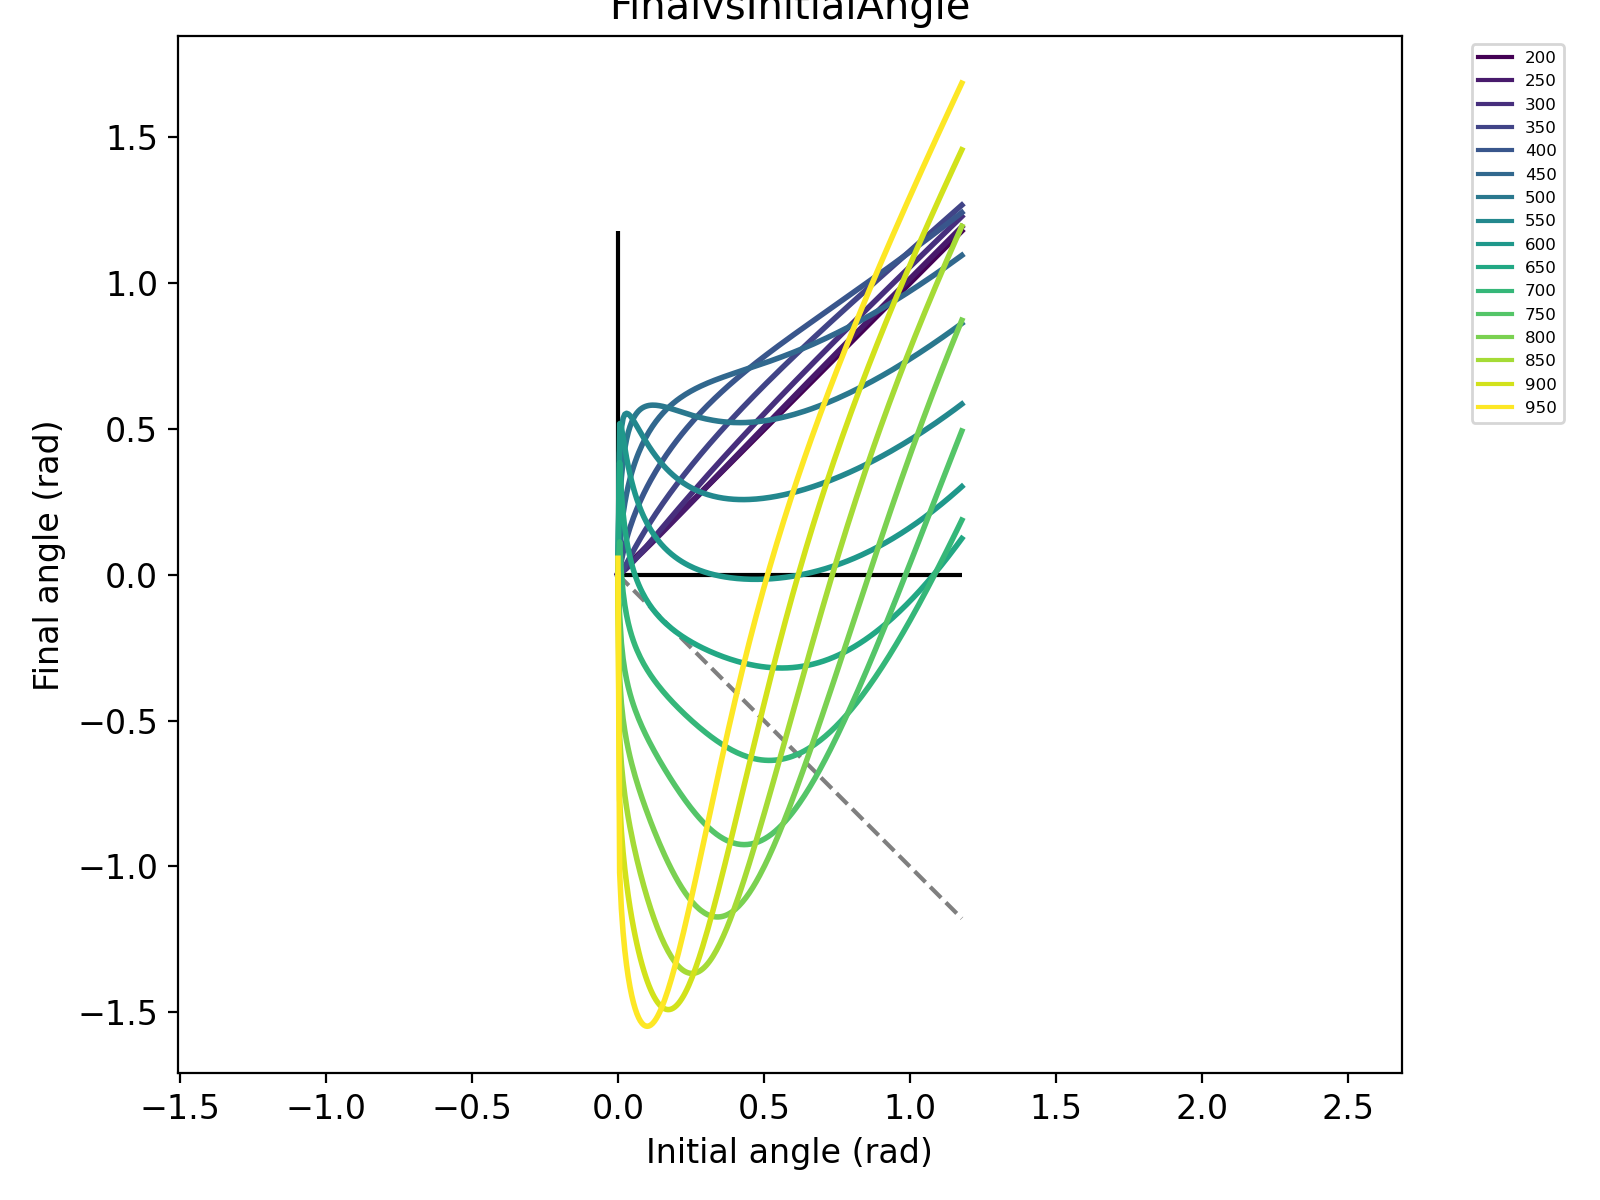

In [6]:
plt.close('all')
from matplotlib.colors import LogNorm
colormap = 'viridis'
file_path = data_folder

title = 'FinalvsInitialAngle'
plt.figure(figsize=(8,6))

# Plot diagonals and guides for detecting fixed points
min_angle = np.min(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '-')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '-')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k', linestyle = '--', alpha = 0.5)
plt.plot(x_array, -y_array, color = 'k', linestyle = '--', alpha = 0.5)


sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = parameter,  
             data = df_combined, legend='full', palette = colormap, linewidth = 2)
# sns.scatterplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = 'd0',  
#              data = df_combined, palette = 'mako', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 6})
plt.tight_layout()
plt.title(title)


plt.axis('equal')


# plt.savefig(os.path.join(file_path,title + '.png'), dpi = 300)
# plt.savefig(os.path.join(file_path,title + '.svg'), dpi = 300)

plt.show()


In [ ]:
# Plot with labels for the lines
fig, ax = plt.subplots()


sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = parameter,  
             data = df_combined, legend='full', palette = colormap, linewidth = 2, ax = ax)

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, df.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Plot diagonals and guides for detecting fixed points
min_angle = np.min(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '-')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '-')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k', linestyle = '--', alpha = 0.5)
plt.plot(x_array, -y_array, color = 'k', linestyle = '--', alpha = 0.5)



# sns.scatterplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = 'd0',  
#              data = df_combined, palette = 'mako', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 6})
plt.tight_layout()
plt.title(title)


plt.axis('equal')


# plt.savefig(os.path.join(file_path,title + '.png'), dpi = 300)
# plt.savefig(os.path.join(file_path,title + '.svg'), dpi = 300)

plt.show()

In [12]:
# Reflect the plot about X and Y to see the full return map of filament orientation

df_combined['-Initial angle (rad)'] = -df_combined['Initial angle (rad)']
df_combined['-Final angle (rad)'] = -df_combined['Final angle (rad)']

<IPython.core.display.Javascript object>


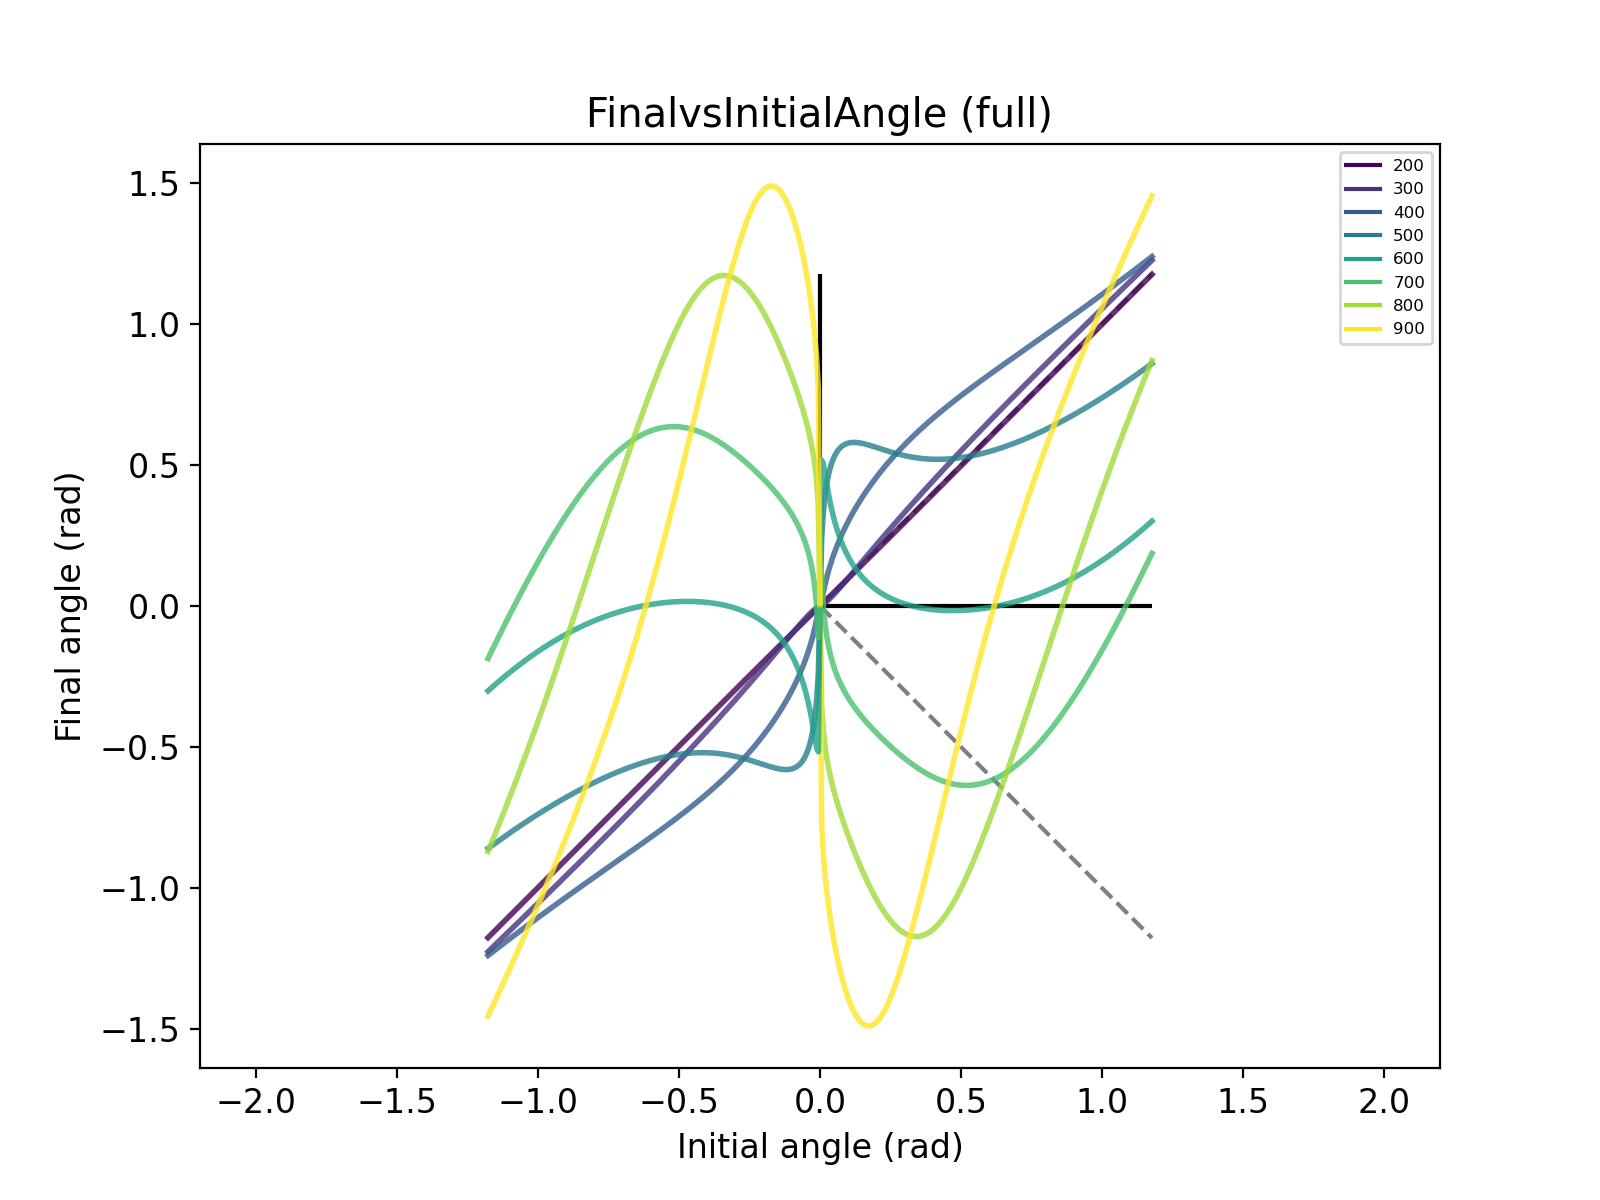

In [13]:
# Plot the overall distribution (for both +ve and -ve initial angles)

title = 'FinalvsInitialAngle (full)'
colormap = 'viridis'
alpha = 0.8

plt.figure(figsize=(8,6))

# Plot diagonals and guides for detecting fixed points
min_angle = -np.max(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

# Plot diagonals and guides for detecting fixed points
min_angle = np.min(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '-')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '-')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k', linestyle = '--', alpha = 0.5)
plt.plot(x_array, -y_array, color = 'k', linestyle = '--', alpha = 0.5)

sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = parameter,  
             data = df_combined, legend='full', palette = colormap, linewidth = 2, alpha = alpha)
sns.lineplot(x='-Initial angle (rad)', y = '-Final angle (rad)', hue = parameter,  
             data = df_combined, legend=False, palette = colormap, linewidth = 2, alpha = alpha)
# sns.scatterplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = 'd0',  
#              data = df_combined, palette = 'mako', legend = False)
ax = plt.gca()
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best')
plt.legend(loc='best', prop={'size': 6})

# plt.tight_layout()
plt.title(title)


# plt.tight_layout()
plt.axis('equal')
# plt.savefig(os.path.join(file_path,title + '.png'), dpi = 300)
# plt.savefig(os.path.join(file_path,title + '.svg'), dpi = 300)

plt.show()


# Fixed-points Analysis

## Find the Fixed-points and analyze their Stability

In [14]:
def find_fixed_points(x, f):
    ''' Given an array x and f which is f(x) evaluated over the array then find all the fixed points
        f(x) = x
    '''
    N = len(x)
    
    indices = []
    for ii in range(N-1):
        if((x[ii]-f[ii]<=0 and x[ii+1] - f[ii+1]>0) or (x[ii]-f[ii]>=0 and x[ii+1]-f[ii+1]<0)):
            indices.append(ii+1)
           
    fixed_points = x[indices]
    
    return indices, fixed_points
    

def find_slope(x, f, x_slope):
    '''
         Given an array x and f which is f(x) evaluated over the array 
         Find the slope f'(x) evaluated at x_slope
    '''
    
    # Evaluate the slope of the function
    gradient = np.gradient(f, x)
    assert(len(gradient) == len(f))
    
    return gradient[x_slope]
    

## 2. Trawl through the data folder and find fixed points and slope

<IPython.core.display.Javascript object>


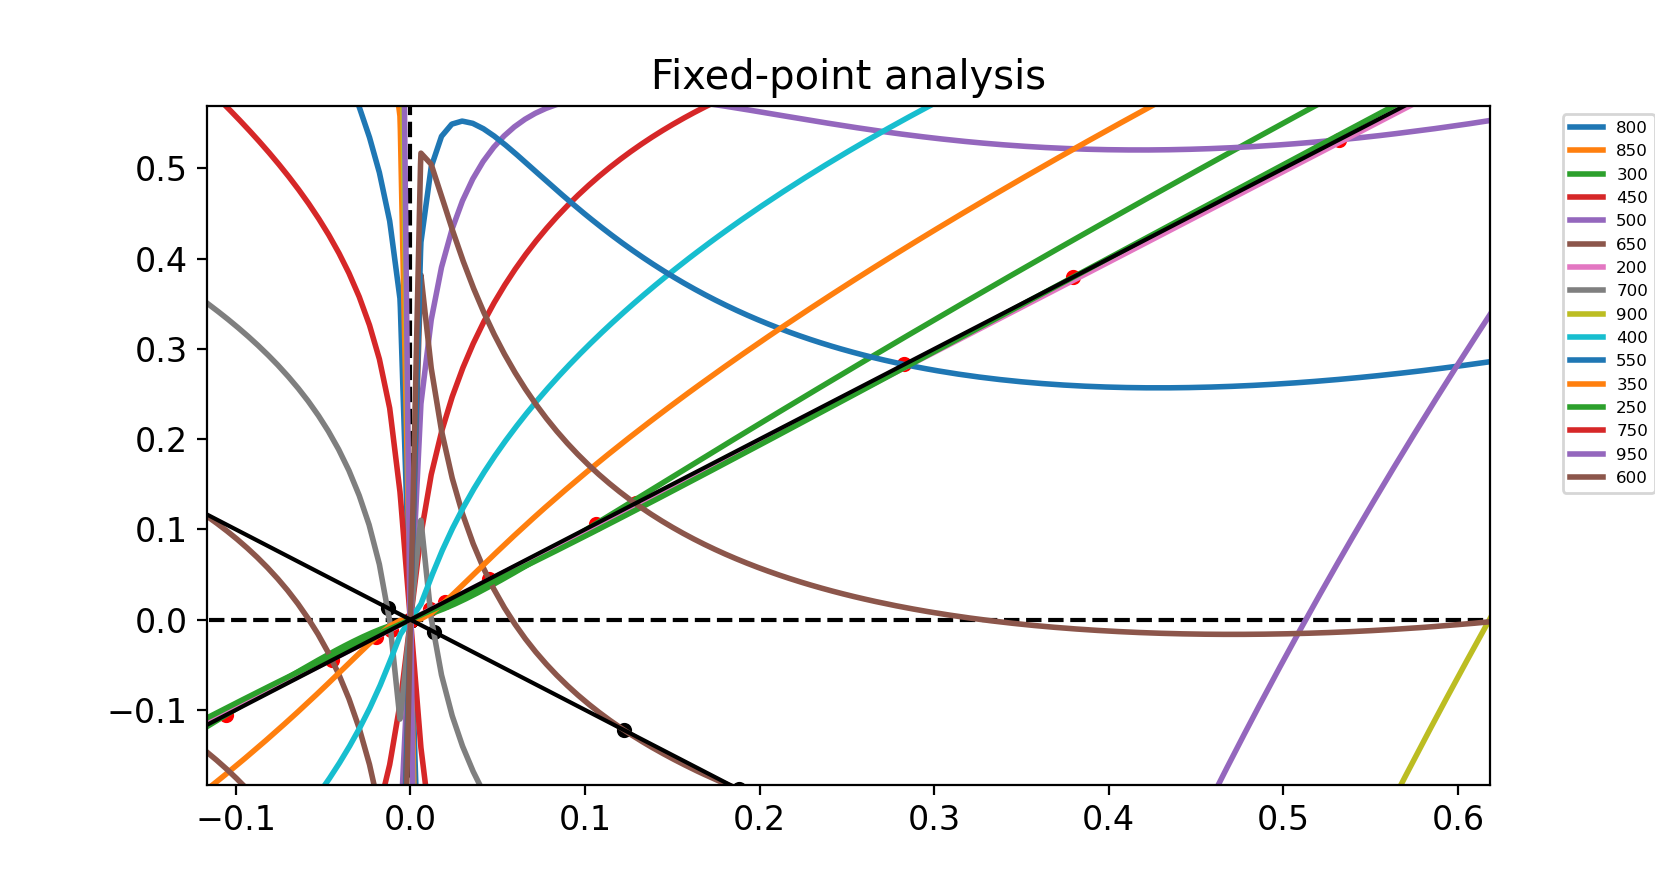

In [42]:
# Better implementation to avoid issues with zero-fixed point analysis

from scipy import interpolate


files = os.listdir(data_folder)

parameter_1 = 'potDipole strength'
parameter = 'activity timescale'


analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

plt.figure(figsize = (6,4))
title = 'Fixed-point analysis'

for ii, file in enumerate(files):
    
    if(file.endswith('csv')):
        
        df = pd.read_csv(os.path.join(data_folder, file))
        
        parameter_value = df[parameter][0]
        
        parameter_value_1 = df[parameter_1][0]
        
        
        initial_angle_array = np.array(df['Initial angle (rad)'])
        final_angle_array = np.array(df['Final angle (rad)'])
        
        initial_angle_array_neg = -init_angle_array
        final_angle_array_neg = -final_angle_array
        
        initial_angle_array_full = np.concatenate((initial_angle_array_neg, initial_angle_array))
        final_angle_array_full = np.concatenate((final_angle_array_neg, final_angle_array))
        
        idx = np.argsort(initial_angle_array_full)
        
        initial_angle_array_full = initial_angle_array_full[idx]
        final_angle_array_full = final_angle_array_full[idx]
        
        
        min_angle, max_angle = np.min(initial_angle_array_full), np.max(initial_angle_array_full)
        
        initial_angle_array_fine = np.linspace(min_angle, max_angle, 10000)
        
        min_angle, max_angle = np.min(initial_angle_array_fine), np.max(initial_angle_array_fine)
        
      
        
        final_angle_func = interpolate.interp1d(initial_angle_array_full, final_angle_array_full, kind = 'linear')
        
        final_angle_array_fine = final_angle_func(initial_angle_array_fine)
        
    
        # Fixed points of f(x) = x
        fixed_points_pos_index, fixed_points_pos = find_fixed_points(initial_angle_array_fine, final_angle_array_fine)
        # Fixed points of f(x)=-x
        fixed_points_neg_index, fixed_points_neg = find_fixed_points(-initial_angle_array_fine, final_angle_array_fine)
        
     
        
        # Find the slope at the fixed-point
        gradient_pos_fixed_points = find_slope(initial_angle_array_fine, 
                                               final_angle_array_fine, fixed_points_pos_index)
        
        gradient_neg_fixed_points = find_slope(initial_angle_array_fine, 
                                               final_angle_array_fine, fixed_points_neg_index)
        
#         gradient_zero_fixed_points = find_slope(initial_angle_array_fine, 
#                                                 final_angle_array_fine, 0)

       
        
        # Plot the Return maps along with the fixed points
        sns.lineplot(x= initial_angle_array_fine, y = final_angle_array_fine, legend='full', 
                     palette = colormap, linewidth = 2, label = parameter_value)
        plt.scatter(initial_angle_array_fine[fixed_points_neg_index], fixed_points_neg, 20, color = 'k')
        plt.scatter(initial_angle_array_fine[fixed_points_pos_index], fixed_points_pos, 20, color = 'r')
        
        
        # For each condition store the fixed points, their type and the slope
        df_fixed_pts_analysis = pd.DataFrame({})

        for ii, fixed_pt in enumerate(fixed_points_pos):
            if(abs(fixed_pt)<=1e-3):
                fixed_pt=0
                
            if(fixed_pt>=0):
                # Due to symmetry it's enough to keep only the positive fixed points
                df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[fixed_pt], 'Slope':[gradient_pos_fixed_points[ii]], 'type':['Positive'], parameter:[parameter_value], parameter_1:[parameter_value_1]}))
        
        for ii, fixed_pt in enumerate(fixed_points_neg):
            if(fixed_pt>=0):
                # Due to symmetry it's enough to keep only the positive fixed points
                df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[fixed_pt], 'Slope':[gradient_neg_fixed_points[ii]], 'type':['Negative'], parameter:[parameter_value], parameter_1:[parameter_value_1]}))

        
     
        # Zero is always a fixed point
#         df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[0], 'Slope':[gradient_zero_fixed_points], 'type':['Trivial'], parameter:[parameter_value]}))

            
        
        df_fixed_pts_analysis.to_csv(os.path.join(analysis_folder, 'FixedPoints_{}_{}_{}_{}.csv'.format(parameter, parameter_value, parameter_1, parameter_value_1)))
        
plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k')
plt.plot(x_array, -y_array, color = 'k')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 6})
# plt.tight_layout()
plt.title(title)
plt.show()



In [76]:
df_fixed_pts_analysis

Fixed point     Slope      type  potDipole strength
0     0.000000  1.569860  Positive               1.026
0     0.032872 -0.560556  Positive               1.026

In [36]:
# For each condition load the fixed points and their slope and analyze the Dynamical behavior of the system.

# Load a test file
# fixed_pt_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/FixedPointAnalysis/FixedPoints_potDipole strength_1.526.csv'

# df_fixed_pt = pd.read_csv(fixed_pt_file)


def dynamical_behavior_predictor(fixed_pt, slope, pt_type):
    '''
    Given the fixed_pt, slope and 
    type of fixed pt 
    f(x) = x: Positive or f(x) = -x: Negative
    
    Returns: behavior Type, Stability
    Type of dynamical behavior expected.
    Types:
    - Trivial fixed point
    - 1-Period cycle
    - 2-Period cycle
    
    Stability:
    - Stable
    - Unstable
    
    '''
    dynamical_behavior = None
    stability = None
    
    if fixed_pt==0:
        dynamical_behavior = 'Zero fixed point'
    
    if fixed_pt!=0:
        
        if pt_type == 'Positive':
            
            dynamical_behavior = '1-Period'
        
        elif pt_type == 'Negative':
            dynamical_behavior = '2-Period'
        
    if abs(slope) > 1:
        stability = 'unstable'
    elif abs(slope) < 1:
        stability = 'linearly stable'
    elif abs(slope)==1:
        stability = 'marginal'
            
    return dynamical_behavior, stability
            
    
# df_fixed_pt


## 3. Calculate and plot the dynamical behaviors for all the data
Save the predicted dynamical behavior and stability in the same file

In [37]:
analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

files = os.listdir(analysis_folder)

for ii, file in tqdm(enumerate(files)):
    
    print(ii)
    df = pd.read_csv(os.path.join(analysis_folder, file))
    
#     df['dynamics'] = []
#     df['stability'] = []

    dynamics_list = []
    stability_list = []
    for jj in range(len(df)):
        
        fixed_pt, slope,  pt_type = df['Fixed point'][jj], df['Slope'][jj], df['type'][jj] 
        
        dynamical_behavior, stability = dynamical_behavior_predictor(fixed_pt, slope, pt_type)
        
        dynamics_list.append(dynamical_behavior)
        stability_list.append(stability)
        
    df['dynamics'] = dynamics_list
    df['stability'] = stability_list
        
    # Save the DataFrame back to disk
    df.to_csv(os.path.join(analysis_folder, file), index = False)



16it [00:00, 365.58it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## 4. For each unique parameter value analyze the fixed-points and tabulate the stable, unstable and predicted dynamics 
The predicted dynamics is the stable dynamics if found, if not we predict the dynamics to be 'Aperiodic'

In [38]:
analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

files = os.listdir(analysis_folder)

df_combined = pd.DataFrame({})

for ii, file in enumerate(files):
    
    df = pd.read_csv(os.path.join(analysis_folder, file))
    
    df_combined = df_combined.append(df)
    
    

# Parameter value(s) of interest.
parameter_1 = 'potDipole strength'
parameter = 'activity timescale'

unique_parameter_values = np.unique(df_combined[parameter][:])

parameter_value_1 = np.unique(df_combined[parameter_1][:])


df_predicted_behavior = pd.DataFrame({})

for parameter_value in unique_parameter_values:
    
    stable_dynamics = []
    unstable_dynamics = []
    predicted_dynamics = []
    
    df = df_combined.loc[df_combined[parameter]==parameter_value]
    
    
    
    if np.all(df['stability']=='unstable'):
        predicted_dynamics = 'Aperiodic'
    
    for ii in range(len(df)):
        
#         print(ii, parameter_value)
        
        print(df['stability'][ii])
        if(df['stability'][ii]=='linearly stable'):
            stable_dynamics = df['dynamics'][ii]
            predicted_dynamics = stable_dynamics

        elif(df['stability'][ii] == 'unstable' and df['type'][ii]!='Trivial'):
            unstable_dynamics.append(df['dynamics'][ii])
            
    
    df_predicted_behavior = df_predicted_behavior.append(pd.DataFrame({parameter: [parameter_value], parameter_1:parameter_value_1,
       'Stable dynamics':[stable_dynamics], 'Unstable dynamics':[unstable_dynamics], 'Predicted dynamics':[predicted_dynamics]}))

linearly stable
linearly stable
unstable
linearly stable
unstable
linearly stable
unstable
unstable
unstable
linearly stable
unstable
linearly stable
unstable
linearly stable
unstable
unstable
unstable
unstable
linearly stable
unstable
unstable
unstable
linearly stable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable
unstable


In [39]:
df_predicted_behavior

activity timescale  potDipole strength   Stable dynamics  \
0                 200                 1.5  Zero fixed point   
0                 250                 1.5  Zero fixed point   
0                 300                 1.5  Zero fixed point   
0                 350                 1.5  Zero fixed point   
0                 400                 1.5                []   
0                 450                 1.5          1-Period   
0                 500                 1.5          1-Period   
0                 550                 1.5          1-Period   
0                 600                 1.5                []   
0                 650                 1.5          2-Period   
0                 700                 1.5          2-Period   
0                 750                 1.5                []   
0                 800                 1.5                []   
0                 850                 1.5                []   
0                 900                 1.5                []   
0                 950                 1.5                []   

                                   Unstable dynamics Predicted dynamics  
0                                                 []   Zero fixed point  
0                                         [1-Period]   Zero fixed point  
0                                         [1-Period]   Zero fixed point  
0                                         [1-Period]   Zero fixed point  
0                                 [Zero fixed point]          Aperiodic  
0                                 [Zero fixed point]           1-Period  
0                                 [Zero fixed point]           1-Period  
0                                 [Zero fixed point]           1-Period  
0                       [Zero fixed point, 1-Period]          Aperiodic  
0             [Zero fixed point, 1-Period, 2-Period]           2-Period  
0             [Zero fixed point, 1-Period, 2-Period]           2-Period  
0                       [Zero fixed point, 2-Period]          Aperiodic  
0                       [Zero fixed point, 2-Period]          Aperiodic  
0             [Zero fixed point, 1-Period, 2-Period]          Aperiodic  
0             [Zero fixed point, 1-Period, 2-Period]          Aperiodic  
0  [Zero fixed point, Zero fixed point, Zero fixe...          Aperiodic

## 5. Save/Load the predicted dynamicsfile

In [7]:
predicted_dynamics_folder = os.path.join(data_folder, 'PredictedDynamics')

if not os.path.exists(predicted_dynamics_folder):
    os.makedirs(predicted_dynamics_folder)

predicted_dynamics_file = os.path.join(predicted_dynamics_folder, 'PredictedDynamics.csv')

if not os.path.exists(predicted_dynamics_file):
    df_predicted_behavior.to_csv(predicted_dynamics_file, index = False)
else:
    
    df_predicted_behavior = pd.read_csv(predicted_dynamics_file)
        

## Plot the predicted dynamics vs the parameter

<IPython.core.display.Javascript object>


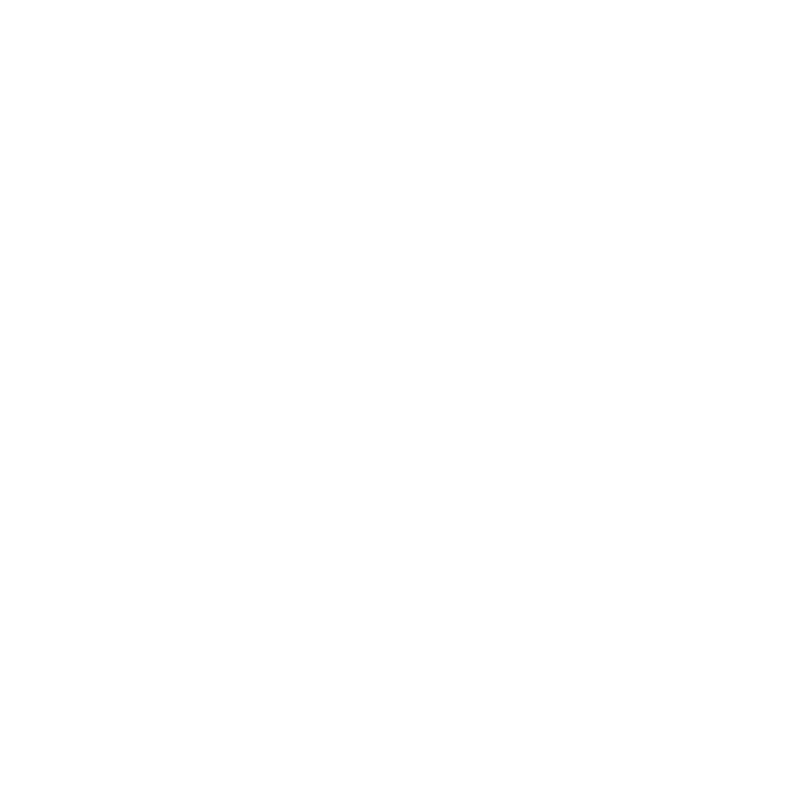

<IPython.core.display.Javascript object>


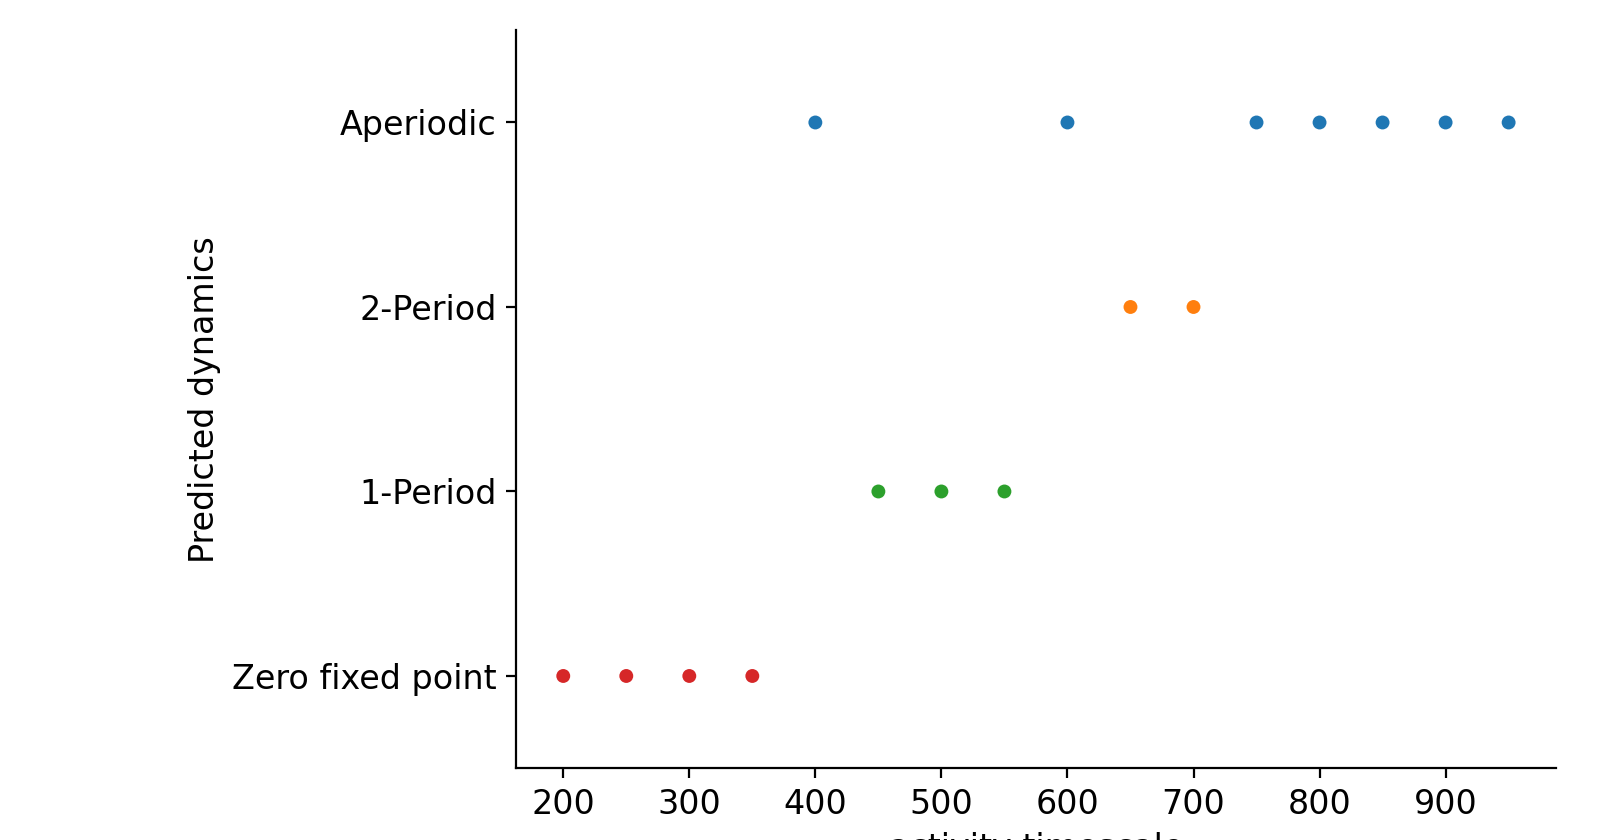

In [8]:
plt.close('all')

plt.figure(figsize = (4,4))
sns.catplot(data = df_predicted_behavior, x = parameter, y = 'Predicted dynamics', order=["Aperiodic", "2-Period", "1-Period", "Zero fixed point"], jitter = False)

plt.show()



## Plot the Return-Map for a single value of the parameter

<IPython.core.display.Javascript object>


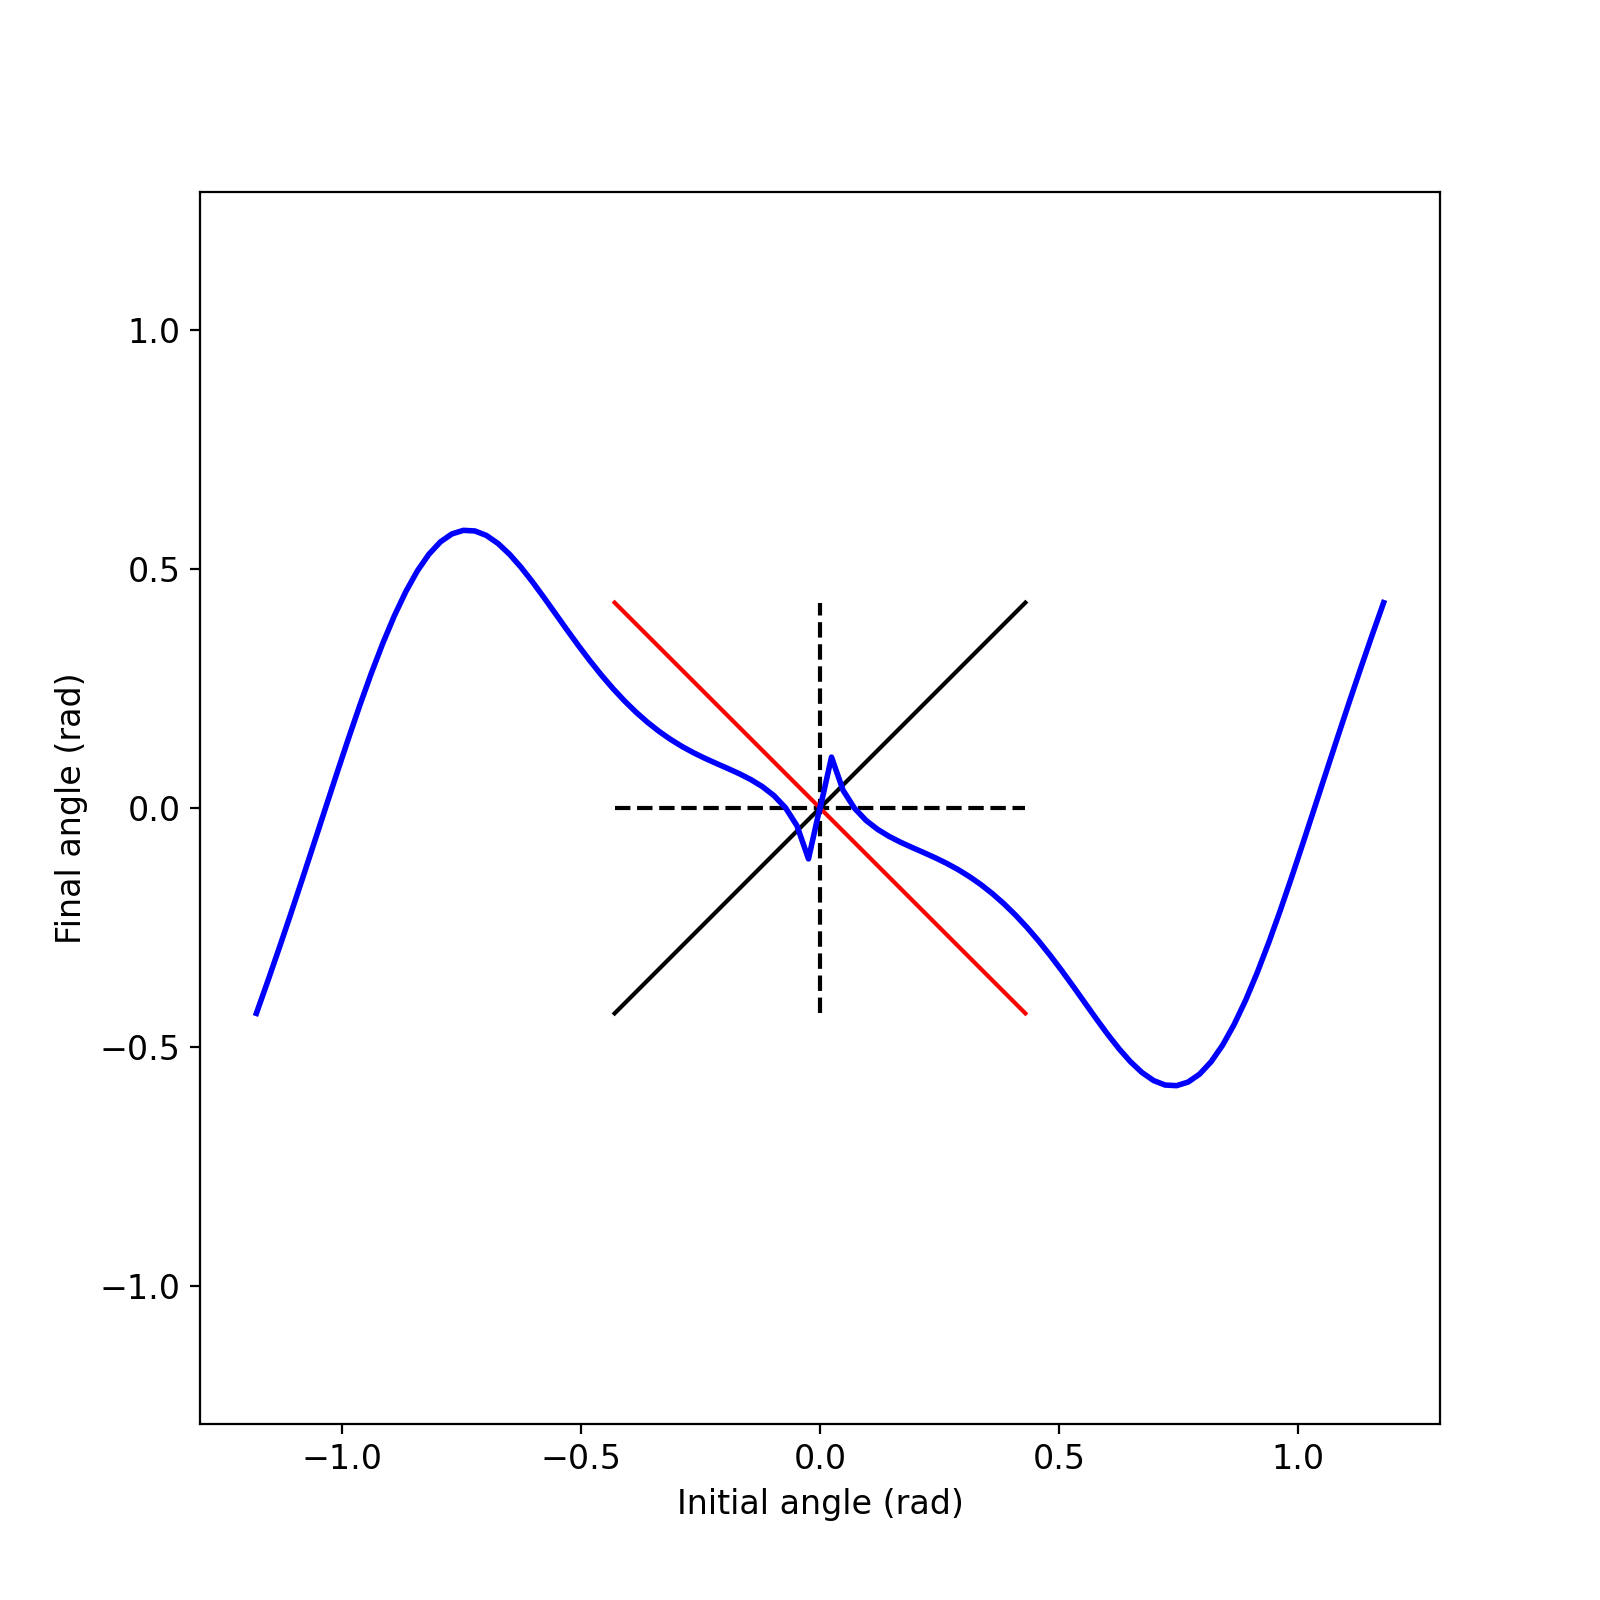

(-1.2959069696057952,
 1.2959069696057952,
 -0.6383976196368173,
 0.6383976196368173)

In [47]:

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.947.csv'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_2.079.csv'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/buckling_escape_angles_750_2.487.csv'
file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_30_Jan_2022/activity_timescale_600/buckling_escape_angles_600_2.474.csv'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2022-03-02/buckling_escape_angles_600_2.474.csv'
df = pd.read_csv(file)

df['-Initial angle (rad)'] = -df['Initial angle (rad)']
df['-Final angle (rad)'] = -df['Final angle (rad)']

min_angle, max_angle = -np.max(df['Final angle (rad)']), np.max(df['Final angle (rad)'])
plt.figure(figsize = (8,8))

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k')
plt.plot(x_array, -y_array, color = 'r')


sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)',  
             data = df, legend='full', color = 'b', linewidth = 2)
sns.lineplot(x='-Initial angle (rad)', y = '-Final angle (rad)',  
             data = df, legend='full', color = 'b', linewidth = 2)

plt.axis('equal')
# plt.savefig('ReturnMap_aperiodic.png', dpi = 300)

# Alternate representations of the orientation velocity vs orientation

-84.86819670142373
74.84952729398748


<IPython.core.display.Javascript object>


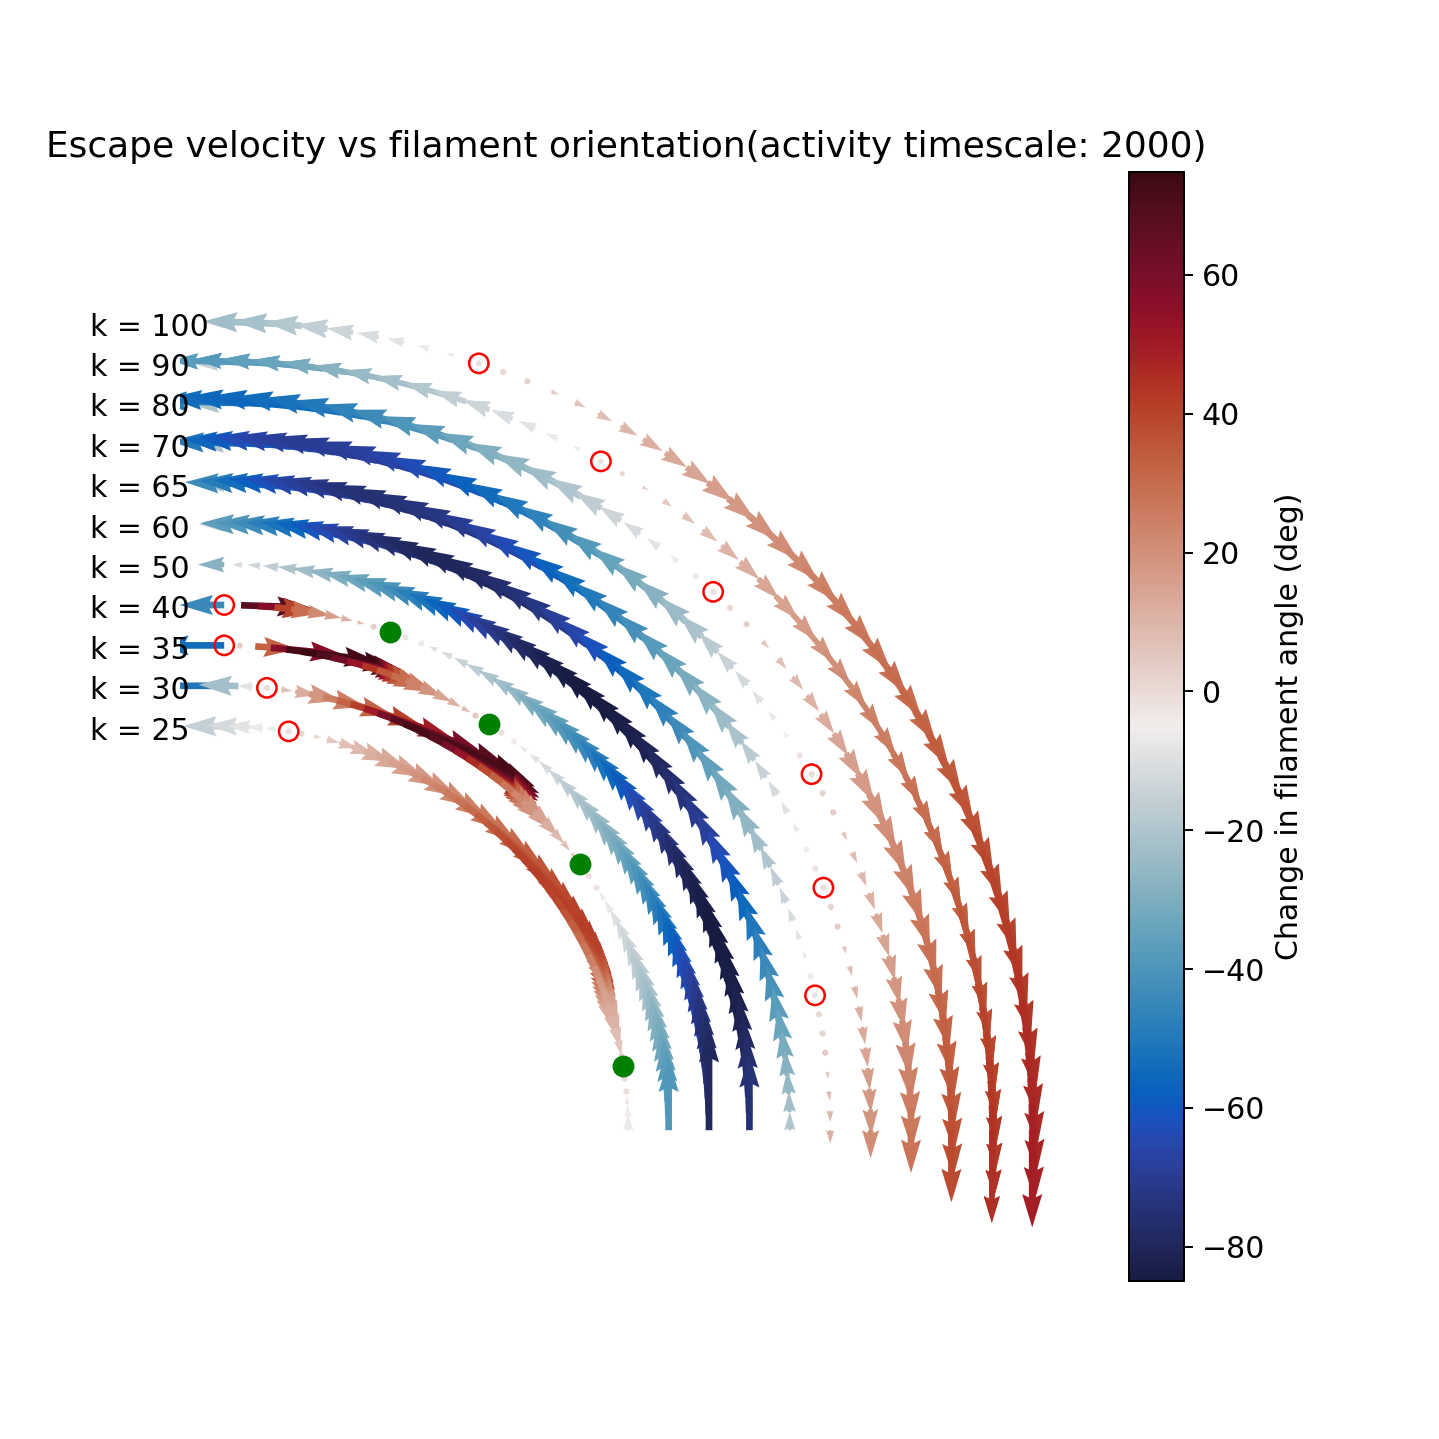

[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


In [268]:
import cmocean
import matplotlib as mpl
file_path = analysis_data_folder

# Plotting it as a polar quiver plot
# Assign a distinct radius for each filament stiffness

delta_min = np.min(df_combined['Delta angle (deg)'])
delta_max = np.max(df_combined['Delta angle (deg)'])

print(delta_min)
print(delta_max)

norm = mpl.colors.Normalize(vmin= delta_min, vmax=delta_max)

cm = cmocean.cm.balance

sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)

plt.figure(figsize=(8,8))
for jj, k in enumerate(spring_constants_to_plot):
    
    df = df_combined[df_combined['spring constant'] == k]
    
    R = 30 + 3*jj
    vx = df['Delta angle (deg)']*np.cos(np.pi/180*df['Initial angle (deg)'])
    vy = -df['Delta angle (deg)']*np.sin(np.pi/180*df['Initial angle (deg)'])
    
    x = R*np.sin(np.pi/180*df['Initial angle (deg)'])
    y = R*np.cos(np.pi/180*df['Initial angle (deg)'])
    
    # Detect fixed-points of Delta angle
    fixed_points = np.where(np.diff(np.sign(df['Delta angle (deg)'])))[0]
    
    # Detect if fixed points are "Stable" or "Unstable"
    stability = np.sign(np.diff(df['Delta angle (deg)'])[fixed_points])
    print(stability)
    
    
    color_data = np.array(df['Delta angle (deg)'])
    
    plt.quiver(x, y, vx, vy, color = cm(norm(color_data)))
    plt.text(x[0]-10, y[0]-1, 'k = '+str(k))
    for ii, fixed_point in enumerate(fixed_points):
        if(stability[ii] > 0):
            # Unstable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, facecolors='none', edgecolors='r')
        elif(stability[ii] < 0):
            # Stable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, color = 'g')
   
cbar = plt.colorbar(sm)
plt.axis('equal')
plt.axis('off')
plt.xlabel('X')
plt.xlabel('Y')
cbar.ax.set_ylabel('Change in filament angle (deg)')
plt.title('Escape velocity vs filament orientation' + '(activity timescale: {})'.format(df['activity time'][0]))
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.png'.format(df['activity time'][0])), dpi = 300)
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.svg'.format(df['activity time'][0])), dpi = 300)

plt.show()
    

In [206]:
A = np.random.rand(10)
B = np.zeros(len(A))
B = np.any(A<0.5)

In [207]:
print(B)

True


In [209]:
1!=1

False